#  Najboljši anime

## Uvod 

Anime se je v zadnjih nekaj letih močno razvil in dosegel tudi srca ljubiteljev serij okrog sveta. K temu so močno pripomogli ponudniki spletnih videotek. Sprva so bili takšni namenjeni izključno animejem (Cruchyroll ali Funimation), vendar pa se v zadnjih letih pojavlja trend, da anime ponujano tudi ostali velikani pretočnih storitev (Netflix). Seveda si vsak navdušenec (aka. anime fan) na svoji poti skozi svet animejev oblikuje nek prepoznaven okus in s tem ni nič narobe. Pa vseeno se pojavijo animeji, ki stopijo korak dlje bodisi v produkciji ali pa vsebini. Le-ti so ponavadi večkrat omenjeni, ko pride do pogovorov o animejih in večkrat se znajdejo na "Top listah" povprečnega gledalca. 
Sam bom analiziral podatke iz najbolj popularne spletne strani z anime informacijami My Anime List (MAL). To kar je IMDB filmom je MAL animejem. Analiza je namenjen vsem: izkušenim navdušencem animejev, da se lahko naslednjič pohvalijo ostalim, da je prav njihova "top lista" objektivno najboljša in da imajo vsi ostali slab okus; navdušencem začetnikom, ki jih samo zanima katere animeje se bolj splača gledati, da bodo bolj gotovo prinesli zadovoljstvo ali pa navdušencem, ki bi radi pregledali vse najbolje ocenjene in si tako zagotovili vlogo v vsakem anime pogovoru.

#### Priprava

In [1]:
import pandas as pd
import os.path
import re
import math

pd.options.display.max_rows = 50


%matplotlib inline

pot_do_anime = os.path.join("anime.csv")
anime = pd.read_csv(pot_do_anime)
zanri = pd.read_csv("zanri.csv")

In [2]:
anime

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
0,Cowboy Bebop,1,26.0,Finished Airing,"Apr 3, 1998",Sunrise,Original,R - 17+ (violence & profanity),8.79,"Apr 24, 1999",1998.0,Spring
1,Cowboy Bebop: Tengoku no Tobira (Cowboy Bebop:...,5,1.0,Finished Airing,"Sep 1, 2001",Bones,Original,R - 17+ (violence & profanity),8.39,NaN,2001.0,Summer
2,Trigun,6,26.0,Finished Airing,"Apr 1, 1998",Madhouse,Manga,PG-13 - Teens 13 or older,8.24,"Sep 30, 1998",1998.0,Spring
3,Witch Hunter Robin,7,26.0,Finished Airing,"Jul 2, 2002",Sunrise,Original,PG-13 - Teens 13 or older,7.28,"Dec 24, 2002",2002.0,Summer
4,Bouken Ou Beet (Beet the Vandel Buster),8,52.0,Finished Airing,"Sep 30, 2004",Toei Animation,Manga,PG - Children,6.98,"Sep 29, 2005",2004.0,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...
17278,Cyber Weapon Z aka(?),43019,1.0,Finished Airing,NaN,NaN,Manga,None,NaN,NaN,NaN,NaN
17279,CYaZALEA☆Kiss☆DADANDAAAN,43041,1.0,Finished Airing,"May 8, 2020",NaN,Other,PG-13 - Teens 13 or older,NaN,NaN,2020.0,Spring
17280,Yami Yami (September 2012),43043,1.0,Finished Airing,"Sep 26, 2012",NaN,Original,G - All Ages,NaN,NaN,2012.0,Summer
17281,Unbelievable Space Love,43044,10.0,Finished Airing,"Jul 17, 2018",NaN,Original,PG-13 - Teens 13 or older,NaN,NaN,2018.0,Summer


In [3]:
zanri

,id,genre
0,1,Action
1,1,Adventure
2,1,Comedy
3,1,Drama
4,1,Sci-Fi
...,...,...
45482,43041,Music
45483,43041,Parody
45484,43043,Music
45485,43044,Romance


V zvezek za anializo sem vpeljal knjižnici pandas in re za obdelavo podatkov ter os.path za lažji dostop do podatkov
Prav tako sem nastavil nekaj zadev, da bo vse skupaj bolje pregledno in pa naložil podatke.

## Analiza podatkov

Glavni indikator tega, kako dober je anime je ocena ("score"). MAL ponuja uporabnikom, da sami ocenijo anime in na podlagi teh glasov in vseh glasov iz spletne strani MAL generira oceno s postopkom "weighted rank". 

Formula je sledeča:
\begin{equation}
WR (A) = \frac{v S + m C }{v + m}
\end{equation}
kjer:

$v$ - število uporabnikov, ki je glasovalo za anime A ($\ast$),
$S$ - povprečna ocena uporabnikov animeja A,
$m$ - minimalno število glasov, ki je potrebno, da se ocena sploh izračuna,
$C$ - povprečna ocena vseh Anime in Manga podatkov s strani MAL

$\ast$ - upošteva se samo glasove računov, ki so pogledali vsaj 20% serije

Če anime nima dovolj glasov nima ocene. Zato bom takšne izločil iz analize.

In [4]:
anime = anime.dropna(subset=["score", "studio", "year"]).sort_values("score", ascending=False)

anime["year"] = anime["year"].astype("Int64")
anime["episodes"] = anime["episodes"].astype("Int64")


In [5]:
anime

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
3946,Fullmetal Alchemist: Brotherhood,5114,64,Finished Airing,"Apr 5, 2009",Bones,Manga,R - 17+ (violence & profanity),9.22,"Jul 4, 2010",2009,Spring
5647,Steins;Gate,9253,24,Finished Airing,"Apr 6, 2011",White Fox,Visual novel,PG-13 - Teens 13 or older,9.12,"Sep 14, 2011",2011,Spring
9813,Gintama° (Gintama Season 4),28977,51,Finished Airing,"Apr 8, 2015",Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,9.11,"Mar 30, 2016",2015,Spring
6431,Hunter x Hunter (2011) (Hunter x Hunter),11061,148,Finished Airing,"Oct 2, 2011",Madhouse,Manga,PG-13 - Teens 13 or older,9.11,"Sep 24, 2014",2011,Fall
741,Ginga Eiyuu Densetsu (Legend of the Galactic H...,820,110,Finished Airing,"Jan 8, 1988",Magic Bus,Novel,R - 17+ (violence & profanity),9.10,"Mar 17, 1997",1988,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
9804,Vampire Holmes,28929,12,Finished Airing,"Apr 4, 2015",Studio! Cucuri,Game,PG-13 - Teens 13 or older,3.39,"Jun 20, 2015",2015,Spring
2563,Panzer Dragoon,2792,1,Finished Airing,"Oct 25, 1996",Production I.G,Game,PG-13 - Teens 13 or older,3.31,NaN,1996,Fall
1215,Soujuu Senshi Psychic Wars (Psychic Wars),1345,1,Finished Airing,"Feb 22, 1991",Toei Animation,Unknown,R+ - Mild Nudity,3.14,NaN,1991,Winter
4322,Abunai Sisters: Koko & Mika,5877,10,Finished Airing,"Jan 15, 2009",Production I.G,Original,R+ - Mild Nudity,2.51,"Mar 5, 2009",2009,Winter


### Najbolši anime

Pa si poglejmo najprej, kateri animeji spadajo v sam vrh, nato pa bomo še malo analizirali.

In [6]:
anime.head(20)

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
3946,Fullmetal Alchemist: Brotherhood,5114,64,Finished Airing,"Apr 5, 2009",Bones,Manga,R - 17+ (violence & profanity),9.22,"Jul 4, 2010",2009,Spring
5647,Steins;Gate,9253,24,Finished Airing,"Apr 6, 2011",White Fox,Visual novel,PG-13 - Teens 13 or older,9.12,"Sep 14, 2011",2011,Spring
9813,Gintama° (Gintama Season 4),28977,51,Finished Airing,"Apr 8, 2015",Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,9.11,"Mar 30, 2016",2015,Spring
6431,Hunter x Hunter (2011) (Hunter x Hunter),11061,148,Finished Airing,"Oct 2, 2011",Madhouse,Manga,PG-13 - Teens 13 or older,9.11,"Sep 24, 2014",2011,Fall
741,Ginga Eiyuu Densetsu (Legend of the Galactic H...,820,110,Finished Airing,"Jan 8, 1988",Magic Bus,Novel,R - 17+ (violence & profanity),9.10,"Mar 17, 1997",1988,Winter
5965,Gintama' (Gintama Season 2),9969,51,Finished Airing,"Apr 4, 2011",Sunrise,Manga,PG-13 - Teens 13 or older,9.08,"Mar 26, 2012",2011,Spring
14687,Shingeki no Kyojin Season 3 Part 2,38524,10,Finished Airing,"Apr 29, 2019",Wit Studio,Manga,R - 17+ (violence & profanity),9.07,"Jul 1, 2019",2019,Spring
7208,Gintama': Enchousen (Gintama: Enchousen),15417,13,Finished Airing,"Oct 4, 2012",Sunrise,Manga,PG-13 - Teens 13 or older,9.04,"Mar 28, 2013",2012,Fall
12700,3-gatsu no Lion 2nd Season (March Comes In Lik...,35180,22,Finished Airing,"Oct 14, 2017",Shaft,Manga,PG-13 - Teens 13 or older,9.02,"Mar 31, 2018",2017,Fall
9786,Koe no Katachi (A Silent Voice),28851,1,Finished Airing,"Sep 17, 2016",Kyoto Animation,Manga,PG-13 - Teens 13 or older,9.01,NaN,2016,Summer


Vidimo, da se en naslov ponovi večkrat, saj MAL tretmira različne sezone istega animeja, kot različne animeje. Ročno bom odstranil take, ki se ponovijo

In [7]:
Top_no_gintama_duplicates = anime[(anime["name"].str.contains("Gintama", re.IGNORECASE) == False) | (anime["name"].str.contains("Gintama Season 4"))]
Top_no_gintama_duplicates.head(20)

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
3946,Fullmetal Alchemist: Brotherhood,5114,64,Finished Airing,"Apr 5, 2009",Bones,Manga,R - 17+ (violence & profanity),9.22,"Jul 4, 2010",2009,Spring
5647,Steins;Gate,9253,24,Finished Airing,"Apr 6, 2011",White Fox,Visual novel,PG-13 - Teens 13 or older,9.12,"Sep 14, 2011",2011,Spring
9813,Gintama° (Gintama Season 4),28977,51,Finished Airing,"Apr 8, 2015",Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,9.11,"Mar 30, 2016",2015,Spring
6431,Hunter x Hunter (2011) (Hunter x Hunter),11061,148,Finished Airing,"Oct 2, 2011",Madhouse,Manga,PG-13 - Teens 13 or older,9.11,"Sep 24, 2014",2011,Fall
741,Ginga Eiyuu Densetsu (Legend of the Galactic H...,820,110,Finished Airing,"Jan 8, 1988",Magic Bus,Novel,R - 17+ (violence & profanity),9.10,"Mar 17, 1997",1988,Winter
14687,Shingeki no Kyojin Season 3 Part 2,38524,10,Finished Airing,"Apr 29, 2019",Wit Studio,Manga,R - 17+ (violence & profanity),9.07,"Jul 1, 2019",2019,Spring
12700,3-gatsu no Lion 2nd Season (March Comes In Lik...,35180,22,Finished Airing,"Oct 14, 2017",Shaft,Manga,PG-13 - Teens 13 or older,9.02,"Mar 31, 2018",2017,Fall
9786,Koe no Katachi (A Silent Voice),28851,1,Finished Airing,"Sep 17, 2016",Kyoto Animation,Manga,PG-13 - Teens 13 or older,9.01,NaN,2016,Summer
11148,Kimi no Na wa. (Your Name.),32281,1,Finished Airing,"Aug 26, 2016",CoMix Wave Films,Original,PG-13 - Teens 13 or older,9.00,NaN,2016,Summer
3512,Clannad: After Story (Clannad ~After Story~),4181,24,Finished Airing,"Oct 3, 2008",Kyoto Animation,Visual novel,PG-13 - Teens 13 or older,8.96,"Mar 27, 2009",2008,Fall


Torej najbolje ocenjen anime vseh časov je očino *Fullmetal Alchemist: Brotherhood*. Opazimo, da so vsi v prvih 20 že zaključenih. Poglejmo še za tiste, ki prihajajo.

In [8]:
Airing = anime[anime["status"] == "Currently Airing"]
Airing.head(10)

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
16048,Tian Guan Ci Fu,40730,11,Currently Airing,"Oct 31, 2020",Haoliners Animation League,Novel,None,8.72,"Jan 2, 2021",2020,Fall
16075,Haikyuu!!: To the Top 2nd Season,40776,12,Currently Airing,"Oct 3, 2020",Production I.G,Manga,PG-13 - Teens 13 or older,8.52,"2020 to, ?",2020,Fall
11,One Piece,21,<NA>,Currently Airing,"Oct 20, 1999",Toei Animation,Manga,PG-13 - Teens 13 or older,8.49,"1999 to, ?",1999,Fall
16013,Kingdom 3rd Season,40682,<NA>,Currently Airing,"Apr 6, 2020",Studio Signpost,Manga,R - 17+ (violence & profanity),8.42,"2020 to, ?",2020,Spring
16061,Jujutsu Kaisen (TV),40748,24,Currently Airing,"Oct 3, 2020",MAPPA,Manga,R - 17+ (violence & profanity),8.33,"2020 to, ?",2020,Fall
15660,Golden Kamuy 3rd Season (Golden Kamuy Season 3),40059,12,Currently Airing,"Oct 5, 2020",Geno Studio,Manga,R - 17+ (violence & profanity),8.32,"2020 to, ?",2020,Fall
14310,Quanzhi Gaoshou 2 (The King's Avatar 2),37932,12,Currently Airing,"Sep 25, 2020",Colored-Pencil Animation Design,Novel,PG-13 - Teens 13 or older,8.21,"2020 to, ?",2020,Summer
211,Detective Conan (Case Closed),235,<NA>,Currently Airing,"Jan 8, 1996",TMS Entertainment,Manga,PG-13 - Teens 13 or older,8.17,"1996 to, ?",1996,Winter
16998,Douluo Dalu: Xiaowu Juebie,42498,<NA>,Currently Airing,"May 23, 2020",Sparkly Key Animation Studio,Novel,PG-13 - Teens 13 or older,8.13,"2020 to, ?",2020,Spring
16449,Tonikaku Kawaii (TONIKAWA: Over the Moon For You),41389,<NA>,Currently Airing,"Oct 3, 2020",Seven Arcs,Manga,None,7.92,"2020 to, ?",2020,Fall


### Najboljši anime po žanrah

Najprej preverimo sploh, koliko žanr MAL priznava.

In [9]:
G = zanri["genre"].unique()
for genre in G:
    display(genre)

'Action'

'Adventure'

'Comedy'

'Drama'

'Sci-Fi'

'Space'

'Mystery'

'Shounen'

'Police'

'Magic'

'Fantasy'

'Sports'

'Josei'

'Romance'

'Cars'

'Seinen'

'Horror'

'Thriller'

'School'

'Ecchi'

'Vampire'

'Military'

'Historical'

'Dementia'

'Mecha'

'Demons'

'Samurai'

'Game'

'Shoujo'

'Harem'

'Music'

'Shoujo Ai'

'Shounen Ai'

'Kids'

'Hentai'

'Parody'

'Yuri'

'Yaoi'

Presenečeno opazimo, da manjka *Slice of Life*, verjetno je bila kje manjša napaka v kodi za ekstraktiranje podatkov in je zato ni :(
    

In [10]:
anime_by_genre = {}
for genre in G:
    anime_by_genre[genre] = zanri[zanri.genre == genre]
    pd.merge(anime, anime_by_genre[genre])

pd.merge(anime, anime_by_genre["Action"])

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season,genre
0,Fullmetal Alchemist: Brotherhood,5114,64,Finished Airing,"Apr 5, 2009",Bones,Manga,R - 17+ (violence & profanity),9.22,"Jul 4, 2010",2009,Spring,Action
1,Gintama° (Gintama Season 4),28977,51,Finished Airing,"Apr 8, 2015",Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,9.11,"Mar 30, 2016",2015,Spring,Action
2,Hunter x Hunter (2011) (Hunter x Hunter),11061,148,Finished Airing,"Oct 2, 2011",Madhouse,Manga,PG-13 - Teens 13 or older,9.11,"Sep 24, 2014",2011,Fall,Action
3,Gintama' (Gintama Season 2),9969,51,Finished Airing,"Apr 4, 2011",Sunrise,Manga,PG-13 - Teens 13 or older,9.08,"Mar 26, 2012",2011,Spring,Action
4,Shingeki no Kyojin Season 3 Part 2,38524,10,Finished Airing,"Apr 29, 2019",Wit Studio,Manga,R - 17+ (violence & profanity),9.07,"Jul 1, 2019",2019,Spring,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,Byston Well Monogatari: Garzey no Tsubasa (Gar...,1657,3,Finished Airing,"Sep 21, 1996",J.C.Staff,Original,PG-13 - Teens 13 or older,4.17,"Apr 9, 1997",1996,Summer,Action
2801,Gibiate,40074,12,Finished Airing,"Jul 15, 2020",l-a-unch・BOX,Original,R - 17+ (violence & profanity),4.00,"Sep 30, 2020",2020,Summer,Action
2802,Wonder Momo,22377,5,Finished Airing,"Feb 6, 2014",Graphinica,Game,PG-13 - Teens 13 or older,3.64,"Mar 6, 2014",2014,Winter,Action
2803,Soujuu Senshi Psychic Wars (Psychic Wars),1345,1,Finished Airing,"Feb 22, 1991",Toei Animation,Unknown,R+ - Mild Nudity,3.14,NaN,1991,Winter,Action


Sedaj pa poglejmo najboljših 10 za vsako žanro posebej.

In [11]:
for genre in sorted(anime_by_genre):
    display(genre)
    merge = pd.merge(anime, anime_by_genre[genre])
    filter_gintama =  merge[(merge["name"].str.contains("Gintama", re.IGNORECASE) == False) | (merge["name"].str.contains("Gintama Season 4"))]
    filter_AoT = filter_gintama[(filter_gintama["name"].str.contains("Shingeki no Kyojin", re.IGNORECASE) == False) | (filter_gintama["name"].str.contains("Shingeki no Kyojin Season 3 Part 2"))]
    filter_SnS = filter_AoT[(filter_AoT["name"].str.contains("Shokugeki no Souma", re.IGNORECASE) == False) | (filter_AoT["score"] == 8.36)]
    filter_demon = filter_SnS[(filter_SnS["name"].str.contains("Natsume Yuujinchou Go", re.IGNORECASE) == False) | (filter_SnS["score"] == 8.68) ]
     
    display(filter_demon[["name", "score"]].head(10))

'Action'

,name,score
0,Fullmetal Alchemist: Brotherhood,9.22
1,Gintama° (Gintama Season 4),9.11
2,Hunter x Hunter (2011) (Hunter x Hunter),9.11
4,Shingeki no Kyojin Season 3 Part 2,9.07
9,Code Geass: Hangyaku no Lelouch R2,8.91
10,Mob Psycho 100 II,8.86
12,Kizumonogatari III: Reiketsu-hen,8.82
14,Cowboy Bebop,8.79
15,Fate/stay night Movie: Heaven's Feel - III. Sp...,8.76
16,Mononoke Hime (Princess Mononoke),8.73


'Adventure'

,name,score
0,Fullmetal Alchemist: Brotherhood,9.22
1,Hunter x Hunter (2011) (Hunter x Hunter),9.11
2,Sen to Chihiro no Kamikakushi (Spirited Away),8.84
3,Cowboy Bebop,8.79
4,Made in Abyss Movie 3: Fukaki Tamashii no Reimei,8.78
5,Mushishi Zoku Shou 2nd Season,8.77
6,Made in Abyss,8.76
7,Mononoke Hime (Princess Mononoke),8.73
8,Mushishi Zoku Shou (MUSHI-SHI -Next Passage-),8.73
9,Vinland Saga,8.72


'Cars'

,name,score
0,Redline,8.29
1,Initial D First Stage,8.28
2,Initial D Final Stage,8.25
3,Initial D Fourth Stage,8.16
4,Initial D Second Stage,8.13
5,Initial D Fifth Stage,8.09
6,Initial D Third Stage,7.90
7,New Initial D Movie: Legend 3 - Mugen,7.84
8,Capeta,7.83
9,New Initial D Movie: Legend 2 - Tousou (Initia...,7.80


'Comedy'

,name,score
0,Fullmetal Alchemist: Brotherhood,9.22
1,Gintama° (Gintama Season 4),9.11
7,Clannad: After Story (Clannad ~After Story~),8.96
8,Owarimonogatari 2nd Season (Owarimonogatari Se...,8.93
9,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...,8.90
10,Mob Psycho 100 II,8.86
13,Kaguya-sama wa Kokurasetai?: Tensai-tachi no R...,8.79
14,Cowboy Bebop,8.79
15,Monogatari Series: Second Season,8.78
16,Haikyuu!! Second Season (Haikyu!! 2nd Season),8.77


'Dementia'

,name,score
0,Neon Genesis Evangelion: The End of Evangelion,8.51
1,Perfect Blue,8.45
2,Neon Genesis Evangelion,8.31
3,Paprika,8.07
4,FLCL,8.03
5,Serial Experiments Lain,8.02
6,Mawaru Penguindrum (Penguindrum),7.99
7,Higurashi no Naku Koro ni (When They Cry),7.97
8,Devilman: Crybaby,7.86
9,Mind Game,7.80


'Demons'

,name,score
0,Natsume Yuujinchou Shi (Natsume's Book of Frie...,8.68
1,Kimetsu no Yaiba (Demon Slayer: Kimetsu no Yaiba),8.67
2,Natsume Yuujinchou Roku (Natsume's Book of Fri...,8.66
3,Natsume Yuujinchou San (Natsume's Book of Frie...,8.60
5,Zoku Natsume Yuujinchou (Natsume's Book of Fri...,8.57
6,Kimetsu no Yaiba Movie: Mugen Ressha-hen,8.50
7,Kenpuu Denki Berserk (Berserk),8.48
8,Yuu☆Yuu☆Hakusho (Yu Yu Hakusho: Ghost Files),8.44
9,Mononoke,8.42
10,Natsume Yuujinchou Movie: Utsusemi ni Musubu,8.41


'Drama'

,name,score
0,Fullmetal Alchemist: Brotherhood,9.22
1,Ginga Eiyuu Densetsu (Legend of the Galactic H...,9.10
2,Shingeki no Kyojin Season 3 Part 2,9.07
3,3-gatsu no Lion 2nd Season (March Comes In Lik...,9.02
4,Koe no Katachi (A Silent Voice),9.01
5,Kimi no Na wa. (Your Name.),9.00
6,Clannad: After Story (Clannad ~After Story~),8.96
7,Code Geass: Hangyaku no Lelouch R2,8.91
8,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...,8.90
9,Sen to Chihiro no Kamikakushi (Spirited Away),8.84


'Ecchi'

,name,score
0,Saenai Heroine no Sodatekata Fine,8.46
3,"No Game No Life (No Game, No Life)",8.24
5,Nisemonogatari,8.18
6,Tsukimonogatari,8.15
8,Kill la Kill,8.12
9,Golden Boy,8.02
10,Nekomonogatari: Kuro (Nekomonogatari Black),7.99
11,Nanatsu no Taizai (The Seven Deadly Sins),7.96
12,Isekai no Seikishi Monogatari (Tenchi Muyo! Wa...,7.87
13,Saenai Heroine no Sodatekata ♭,7.80


'Fantasy'

,name,score
0,Fullmetal Alchemist: Brotherhood,9.22
1,Hunter x Hunter (2011) (Hunter x Hunter),9.11
2,Shingeki no Kyojin Season 3 Part 2,9.07
3,Made in Abyss Movie 3: Fukaki Tamashii no Reimei,8.78
4,Mushishi Zoku Shou 2nd Season,8.77
5,Fate/stay night Movie: Heaven's Feel - III. Sp...,8.76
6,Made in Abyss,8.76
7,Mononoke Hime (Princess Mononoke),8.73
8,Mushishi Zoku Shou (MUSHI-SHI -Next Passage-),8.73
9,Mushishi (Mushi-Shi),8.70


'Game'

,name,score
0,3-gatsu no Lion 2nd Season (March Comes In Lik...,9.02
1,Chihayafuru 3,8.54
2,3-gatsu no Lion (March comes in like a lion),8.44
3,Chihayafuru 2,8.44
4,No Game No Life: Zero,8.37
5,Gyakkyou Burai Kaiji: Ultimate Survivor (Kaiji...,8.28
6,Gyakkyou Burai Kaiji: Hakairoku-hen (Kaiji: Ag...,8.25
7,Chihayafuru,8.25
8,"No Game No Life (No Game, No Life)",8.24
9,Quanzhi Gaoshou Zhi Dianfeng Rongyao,8.23


'Harem'

,name,score
0,Saenai Heroine no Sodatekata Fine,8.46
1,Ouran Koukou Host Club (Ouran High School Host...,8.21
2,Kami nomi zo Shiru Sekai: Megami-hen,8.10
3,Kami nomi zo Shiru Sekai II (The World God Onl...,7.96
4,Grisaia no Rakuen (The Eden of Grisaia),7.89
5,Isekai no Seikishi Monogatari (Tenchi Muyo! Wa...,7.87
6,Saenai Heroine no Sodatekata ♭,7.80
7,Hayate no Gotoku!! (Hayate the Combat Butler!!),7.75
8,Kami nomi zo Shiru Sekai (The World God Only K...,7.75
9,Kami nomi zo Shiru Sekai: Tenri-hen,7.73


'Hentai'

,name,score
0,Mankitsu Happening,7.74
1,Rance 01: Hikari wo Motomete The Animation,7.65
2,Ane wa Yanmama Junyuu-chuu,7.61
3,Eroge! H mo Game mo Kaihatsu Zanmai,7.58
4,Youkoso! Sukebe Elf no Mori e,7.51
5,Kanojo x Kanojo x Kanojo: Sanshimai to no Doki...,7.49
6,Kuroinu: Kedakaki Seijo wa Hakudaku ni Somaru,7.45
7,Tsugou no Yoi Sexfriend?,7.45
8,Maki-chan to Now.,7.44
9,Stringendo: Angel-tachi no Private Lesson (Str...,7.43


'Historical'

,name,score
0,Gintama° (Gintama Season 4),9.11
8,Mushishi Zoku Shou 2nd Season,8.77
9,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,8.73
10,Mushishi Zoku Shou (MUSHI-SHI -Next Passage-),8.73
11,Vinland Saga,8.72
12,Tian Guan Ci Fu,8.72
13,Mushishi (Mushi-Shi),8.70
14,Kimetsu no Yaiba (Demon Slayer: Kimetsu no Yaiba),8.67
15,Mushishi Zoku Shou: Suzu no Shizuku,8.64
16,Shouwa Genroku Rakugo Shinjuu (Showa Genroku R...,8.60


'Horror'

,name,score
0,Monster,8.74
1,Yakusoku no Neverland (The Promised Neverland),8.65
2,Kenpuu Denki Berserk (Berserk),8.48
3,Perfect Blue,8.45
4,Kiseijuu: Sei no Kakuritsu (Parasyte -the maxim-),8.42
5,Mononoke,8.42
6,Hellsing Ultimate,8.41
7,Shinsekai yori (From the New World),8.37
8,Jujutsu Kaisen (TV),8.33
9,Berserk: Ougon Jidai-hen III - Kourin,8.22


'Josei'

,name,score
0,Shouwa Genroku Rakugo Shinjuu (Showa Genroku R...,8.60
1,Chihayafuru 3,8.54
2,Chihayafuru 2,8.44
3,Usagi Drop (Bunny Drop),8.44
4,Sakamichi no Apollon (Kids on the Slope),8.37
5,Nodame Cantabile,8.33
6,Nodame Cantabile: Finale,8.28
7,Hachimitsu to Clover II (Honey and Clover II),8.27
8,Chihayafuru,8.25
9,Nodame Cantabile: Paris-hen,8.18


'Kids'

,name,score
0,Tanoshii Muumin Ikka,8.10
1,Stand By Me Doraemon,8.05
2,Omae Umasou da na (You Are Umasou),8.02
3,Yume-iro Pâtissière,7.89
4,Doraemon Movie 31: Shin Nobita to Tetsujin Hei...,7.87
5,Digimon Adventure (Digimon: Digital Monsters),7.80
6,Ie Naki Ko,7.79
7,Pokemon: The Origin (Pokémon: Origins),7.77
8,Digimon Adventure: Bokura no War Game! (Digimo...,7.77
9,Chi's Sweet Home: Atarashii Ouchi (Chi's New A...,7.76


'Magic'

,name,score
0,Fullmetal Alchemist: Brotherhood,9.22
1,Fate/stay night Movie: Heaven's Feel - III. Sp...,8.76
2,Fate/stay night Movie: Heaven's Feel - II. Los...,8.60
3,Fate/Zero 2nd Season (Fate/Zero Season 2),8.60
4,Kono Subarashii Sekai ni Shukufuku wo!: Kurena...,8.55
5,Mahou Shoujo Madoka★Magica Movie 3: Hangyaku n...,8.44
6,Mahou Shoujo Madoka★Magica Movie 2: Eien no Mo...,8.39
7,Mahou Shoujo Madoka★Magica (Puella Magi Madoka...,8.39
8,Fate/Zero,8.36
9,Fate/stay night: Unlimited Blade Works 2nd Season,8.34


'Mecha'

,name,score
0,Code Geass: Hangyaku no Lelouch R2,8.91
1,Code Geass: Hangyaku no Lelouch,8.72
2,Tengen Toppa Gurren Lagann (Gurren Lagann),8.67
3,Tengen Toppa Gurren Lagann Movie 2: Lagann-hen,8.57
4,Koukaku Kidoutai: Stand Alone Complex 2nd GIG,8.54
5,Neon Genesis Evangelion: The End of Evangelion,8.51
6,Koukaku Kidoutai: Stand Alone Complex,8.45
7,Mobile Suit Gundam: The Origin,8.36
8,Evangelion: 2.0 You Can (Not) Advance,8.35
9,Neon Genesis Evangelion,8.31


'Military'

,name,score
0,Fullmetal Alchemist: Brotherhood,9.22
1,Ginga Eiyuu Densetsu (Legend of the Galactic H...,9.10
2,Shingeki no Kyojin Season 3 Part 2,9.07
3,Code Geass: Hangyaku no Lelouch R2,8.91
4,Code Geass: Hangyaku no Lelouch,8.72
5,Koukaku Kidoutai: Stand Alone Complex 2nd GIG,8.54
7,Kenpuu Denki Berserk (Berserk),8.48
9,Koukaku Kidoutai: Stand Alone Complex,8.45
10,Kingdom 3rd Season,8.42
11,Hellsing Ultimate,8.41


'Music'

,name,score
0,Shigatsu wa Kimi no Uso (Your Lie in April),8.77
1,Gotcha!,8.47
2,Nana,8.45
3,Kono Oto Tomare! 2nd Season,8.43
4,Sakamichi no Apollon (Kids on the Slope),8.37
5,Shelter,8.35
6,K-On! Movie (K-ON! The Movie),8.34
7,Nodame Cantabile,8.33
8,Beck (Beck: Mongolian Chop Squad),8.32
9,Given,8.30


'Mystery'

,name,score
0,Shingeki no Kyojin Season 3 Part 2,9.07
1,Owarimonogatari 2nd Season (Owarimonogatari Se...,8.93
2,Kizumonogatari III: Reiketsu-hen,8.82
3,Monogatari Series: Second Season,8.78
4,Made in Abyss Movie 3: Fukaki Tamashii no Reimei,8.78
5,Mushishi Zoku Shou 2nd Season,8.77
6,Made in Abyss,8.76
7,Monster,8.74
8,Mushishi Zoku Shou (MUSHI-SHI -Next Passage-),8.73
9,Mushishi (Mushi-Shi),8.70


'Parody'

,name,score
0,Gintama° (Gintama Season 4),9.11
8,One Punch Man,8.60
9,Kono Subarashii Sekai ni Shukufuku wo!: Kurena...,8.55
15,Kono Subarashii Sekai ni Shukufuku wo! 2,8.32
17,Kono Subarashii Sekai ni Shukufuku wo!,8.16
22,Osomatsu-san (Mr. Osomatsu),8.03
23,FLCL,8.03
24,Zoku Sayonara Zetsubou Sensei,7.93
25,"Sayonara Zetsubou Sensei (Sayonara, Zetsubou-S...",7.91
26,Zan Sayonara Zetsubou Sensei,7.91


'Police'

,name,score
0,Monster,8.74
1,Death Note,8.62
2,Koukaku Kidoutai: Stand Alone Complex 2nd GIG,8.54
3,Koukaku Kidoutai: Stand Alone Complex,8.45
4,Psycho-Pass,8.39
5,Detective Conan Movie 06: The Phantom of Baker...,8.32
6,Koukaku Kidoutai (Ghost in the Shell),8.30
7,Detective Conan: Episode One - The Great Detec...,8.28
8,Detective Conan Movie 13: The Raven Chaser,8.25
9,Detective Conan Movie 20: The Darkest Nightmare,8.19


'Romance'

,name,score
0,Kimi no Na wa. (Your Name.),9.00
1,Clannad: After Story (Clannad ~After Story~),8.96
2,Kaguya-sama wa Kokurasetai?: Tensai-tachi no R...,8.79
3,Monogatari Series: Second Season,8.78
4,Shigatsu wa Kimi no Uso (Your Lie in April),8.77
5,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,8.73
6,Seishun Buta Yarou wa Yumemiru Shoujo no Yume ...,8.70
7,Howl no Ugoku Shiro (Howl's Moving Castle),8.67
8,Suzumiya Haruhi no Shoushitsu,8.67
9,Yojouhan Shinwa Taikei (The Tatami Galaxy),8.61


'Samurai'

,name,score
0,Gintama° (Gintama Season 4),9.11
8,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,8.73
11,Samurai Champloo,8.50
13,Stranger: Mukou Hadan (Sword of the Stranger),8.32
14,Rurouni Kenshin: Meiji Kenkaku Romantan (Rurou...,8.32
16,Dororo,8.18
21,Rurouni Kenshin: Meiji Kenkaku Romantan - Seis...,8.00
22,Hyouge Mono,7.99
23,Drifters,7.95
24,Saraiya Goyou (House of Five Leaves),7.83


'School'

,name,score
0,Koe no Katachi (A Silent Voice),9.01
1,Kimi no Na wa. (Your Name.),9.00
2,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...,8.90
3,Kaguya-sama wa Kokurasetai?: Tensai-tachi no R...,8.79
4,Shigatsu wa Kimi no Uso (Your Lie in April),8.77
5,Haikyuu!! Second Season (Haikyu!! 2nd Season),8.77
6,Code Geass: Hangyaku no Lelouch,8.72
7,Seishun Buta Yarou wa Yumemiru Shoujo no Yume ...,8.70
8,Great Teacher Onizuka,8.70
9,Suzumiya Haruhi no Shoushitsu,8.67


'Sci-Fi'

,name,score
0,Steins;Gate,9.12
1,Gintama° (Gintama Season 4),9.11
2,Ginga Eiyuu Densetsu (Legend of the Galactic H...,9.10
8,Code Geass: Hangyaku no Lelouch R2,8.91
11,Cowboy Bebop,8.79
12,Made in Abyss Movie 3: Fukaki Tamashii no Reimei,8.78
13,Made in Abyss,8.76
14,Code Geass: Hangyaku no Lelouch,8.72
15,Suzumiya Haruhi no Shoushitsu,8.67
16,Tengen Toppa Gurren Lagann (Gurren Lagann),8.67


'Seinen'

,name,score
0,3-gatsu no Lion 2nd Season (March Comes In Lik...,9.02
1,Kaguya-sama wa Kokurasetai?: Tensai-tachi no R...,8.79
2,Mushishi Zoku Shou 2nd Season,8.77
3,Monster,8.74
4,Mushishi Zoku Shou (MUSHI-SHI -Next Passage-),8.73
5,Vinland Saga,8.72
6,Mushishi (Mushi-Shi),8.70
7,Mushishi Zoku Shou: Suzu no Shizuku,8.64
8,Ping Pong the Animation,8.63
9,Mushishi: Hihamukage (The Shadow that Devours ...,8.58


'Shoujo'

,name,score
0,Natsume Yuujinchou Shi (Natsume's Book of Frie...,8.68
1,Natsume Yuujinchou Roku (Natsume's Book of Fri...,8.66
2,Natsume Yuujinchou San (Natsume's Book of Frie...,8.60
4,Zoku Natsume Yuujinchou (Natsume's Book of Fri...,8.57
5,Fruits Basket 2nd Season,8.55
6,Nana,8.45
7,Natsume Yuujinchou Movie: Utsusemi ni Musubu,8.41
8,Natsume Yuujinchou Roku Specials,8.41
9,Banana Fish,8.40
10,Hotarubi no Mori e,8.40


'Shoujo Ai'

,name,score
0,Yuru Yuri San☆Hai!,7.97
1,Yagate Kimi ni Naru (Bloom Into You),7.94
2,Yuru Yuri Nachuyachumi!,7.89
3,Maria-sama ga Miteru 3rd (Maria Watches Over U...,7.87
4,Yuru Yuri♪♪ (YuruYuri: Happy Go Lily ♪♪),7.86
5,Maria-sama ga Miteru 4th (Maria Watches Over U...,7.83
6,Yuru Yuri Nachuyachumi!+,7.80
7,"Oniisama e... (Brother, Dear Brother)",7.78
8,Asagao to Kase-san.,7.74
9,"Yuru Yuri,",7.69


'Shounen'

,name,score
0,Fullmetal Alchemist: Brotherhood,9.22
1,Gintama° (Gintama Season 4),9.11
2,Hunter x Hunter (2011) (Hunter x Hunter),9.11
4,Shingeki no Kyojin Season 3 Part 2,9.07
6,Koe no Katachi (A Silent Voice),9.01
10,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...,8.90
13,Shigatsu wa Kimi no Uso (Your Lie in April),8.77
14,Haikyuu!! Second Season (Haikyu!! 2nd Season),8.77
15,Hajime no Ippo (Fighting Spirit),8.76
16,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,8.73


'Shounen Ai'

,name,score
0,Given,8.30
1,Doukyuusei (Movie) (Doukyusei -Classmates-),8.30
2,Sekaiichi Hatsukoi 2,8.01
3,Sekaiichi Hatsukoi OVA,7.98
4,Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no...,7.98
5,Sekaiichi Hatsukoi: Valentine-hen,7.89
6,Junjou Romantica 2 (Junjo Romantica 2),7.89
7,Junjou Romantica OVA,7.83
8,Sekaiichi Hatsukoi,7.82
9,Junjou Romantica 3 (Junjo Romantica 3),7.81


'Space'

,name,score
0,Ginga Eiyuu Densetsu (Legend of the Galactic H...,9.10
1,Cowboy Bebop,8.79
2,Tengen Toppa Gurren Lagann Movie 2: Lagann-hen,8.57
3,Uchuu Kyoudai (Space Brothers),8.53
4,Cowboy Bebop: Tengoku no Tobira (Cowboy Bebop:...,8.39
5,Uchuu Senkan Yamato 2199,8.38
6,Mobile Suit Gundam: The Origin,8.36
7,Planetes,8.31
8,Space☆Dandy 2nd Season (Space Dandy 2nd Season),8.27
9,Mobile Suit Gundam: Iron-Blooded Orphans 2nd S...,8.24


'Sports'

,name,score
0,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...,8.90
1,Haikyuu!! Second Season (Haikyu!! 2nd Season),8.77
2,Hajime no Ippo (Fighting Spirit),8.76
3,Hajime no Ippo: New Challenger (Fighting Spiri...,8.68
4,Ashita no Joe 2 (Rocky Joe 2),8.67
5,Ping Pong the Animation,8.63
6,Hajime no Ippo: Rising (Hajime No Ippo: The Fi...,8.60
7,Haikyuu!! (Haikyu!!),8.57
8,Chihayafuru 3,8.54
9,Slam Dunk,8.53


'Thriller'

,name,score
0,Steins;Gate,9.12
1,Monster,8.74
2,Yakusoku no Neverland (The Promised Neverland),8.65
3,Death Note,8.62
4,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,8.59
5,Kara no Kyoukai 5: Mujun Rasen,8.57
6,Rainbow: Nisha Rokubou no Shichinin (Rainbow),8.52
7,Steins;Gate 0,8.52
8,Kara no Kyoukai 7: Satsujin Kousatsu (Go),8.44
9,Mahou Shoujo Madoka★Magica Movie 3: Hangyaku n...,8.44


'Vampire'

,name,score
0,Owarimonogatari 2nd Season (Owarimonogatari Se...,8.93
1,Kizumonogatari III: Reiketsu-hen,8.82
2,Monogatari Series: Second Season,8.78
3,Kizumonogatari II: Nekketsu-hen (Kizumonogatar...,8.62
4,Owarimonogatari,8.46
5,Hellsing Ultimate,8.41
6,Zoku Owarimonogatari,8.41
7,Kizumonogatari I: Tekketsu-hen (Kizumonogatari...,8.41
8,Bakemonogatari,8.36
9,JoJo no Kimyou na Bouken (TV) (JoJo's Bizarre ...,8.12


'Yaoi'

,name,score
0,Saezuru Tori wa Habatakanai: The Clouds Gather,7.61
1,Fuyu no Semi (Embracing Love: A Cicada in Winter),7.54
2,Ai no Kusabi,7.15
3,Koisuru Boukun,7.15
4,"Seitokaichou ni Chuukoku (Hey, Class President!)",7.07
5,Fuyu no Semi Special,7.05
6,Ikoku Irokoi Romantan,7.03
7,Yarichin☆Bitch-bu,6.83
8,Hyakujitsu no Bara: Jinginaki Nikukyuu-hen (Ma...,6.78
9,Sensitive Pornograph,6.78


'Yuri'

,name,score
0,Sono Hanabira ni Kuchizuke wo: Anata to Koibit...,7.27
1,Futa-bu!!,7.21
2,Futa-bu!,7.11
3,Discipline (Discipline: The Hentai Academy),6.89
4,Nikutai Ten'i (Body Transfer),6.34
5,Cream Lemon,6.30
6,"Nageki no Kenkou Yuuryouji (F3: Frantic, Frust...",6.22
7,Kojin Jugyou (Private Psycho Lesson),5.42


Na hitro sem preletel vse žanre in v primeru da je štiri ali več mest na lestvici top 10 zasedal isti anime, samo različne sezone, sem ohranil le najbolje ocenjeno sezono. S tem pridobil na pregledonsti.

### Najboljši studio

Poglejmo si najprej malo informacij o tem, če obstajakakšen vzorec ali pa relacija med studiji in animeji, ki jih izdajo. Zanimajo nas večja, bolj zanan studia, zato bom manjše izvzel. In zanima me, če imam dva studia, katerega izbati, da bo večja verjetnost, da bo kvaliteta animeja boljša.

<AxesSubplot:xlabel='studio'>

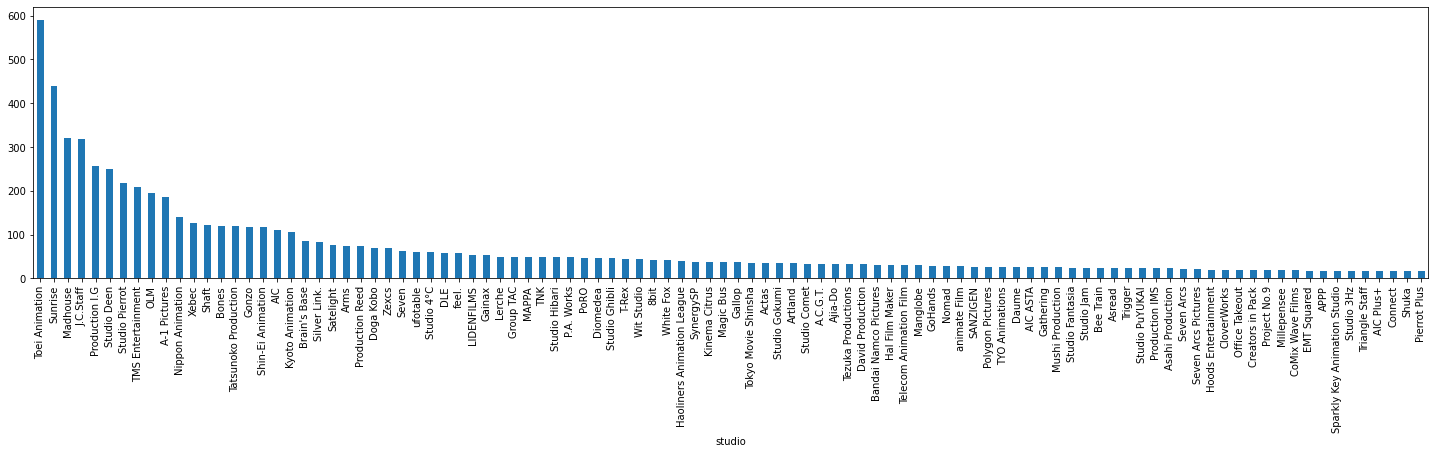

In [12]:
studios = anime.groupby("studio").size().sort_values(ascending=False).head(100)
studios.plot.bar(figsize=(25, 5))

Poglejmo, če obstaja povezava med tem, koliko animejev narediš in tem, kako so uspešni (ocena več kot 7). Kaj pa taki, ki so veliko bolj uspešni (ocena več kot 8 in 8.5)?


In [13]:
good_studios = anime[anime["score"] >= 7].groupby("studio").size().sort_values(ascending=False).head(100)
better_studios = anime[anime["score"] >= 8].groupby("studio").size().sort_values(ascending=False).head(100)
best_studios = anime[anime["score"] >= 8.5].groupby("studio").size().sort_values(ascending=False).head(100)

display(good_studios.head(10))
display(better_studios.head(10))
display(best_studios.head(10))
 


studio
Toei Animation       220
Sunrise              208
J.C.Staff            154
Madhouse             153
Production I.G       146
Studio Deen          138
TMS Entertainment    123
A-1 Pictures         117
Studio Pierrot        99
Bones                 85
dtype: int64

studio
Madhouse             44
Production I.G       36
Sunrise              29
TMS Entertainment    26
Bones                25
Kyoto Animation      22
J.C.Staff            22
A-1 Pictures         21
Shaft                19
Toei Animation       16
dtype: int64

studio
Madhouse                 10
Sunrise                   8
Production I.G            6
ufotable                  6
Artland                   5
Bandai Namco Pictures     5
Kyoto Animation           5
Shaft                     5
White Fox                 4
Studio Ghibli             4
dtype: int64

<AxesSubplot:xlabel='studio'>

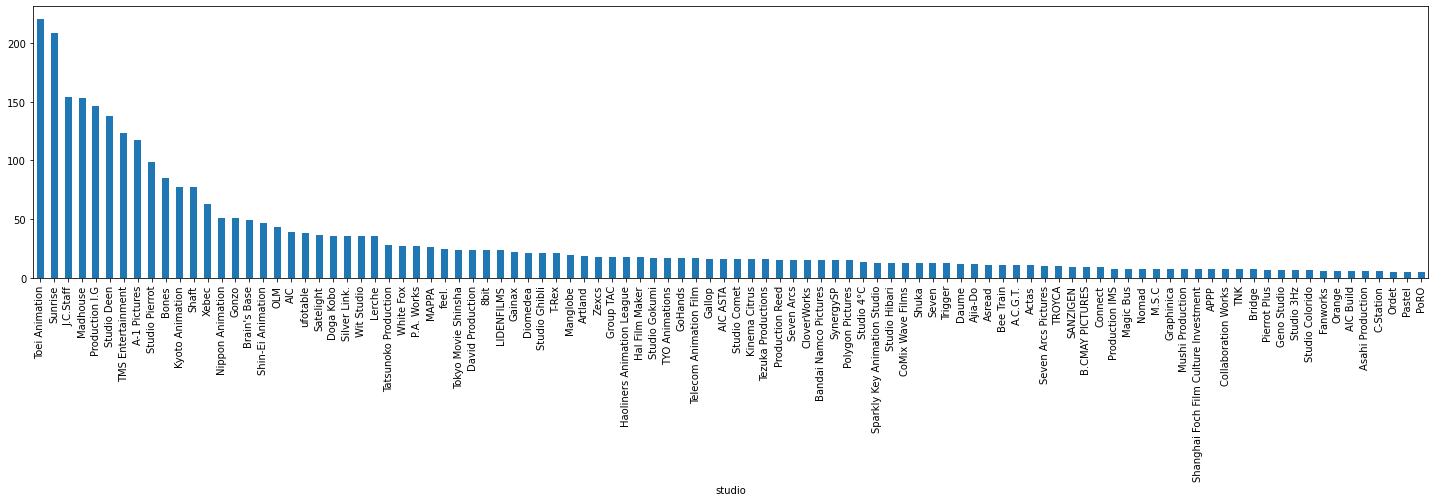

In [14]:
good_studios.plot.bar(figsize=(25, 5))

<AxesSubplot:xlabel='studio'>

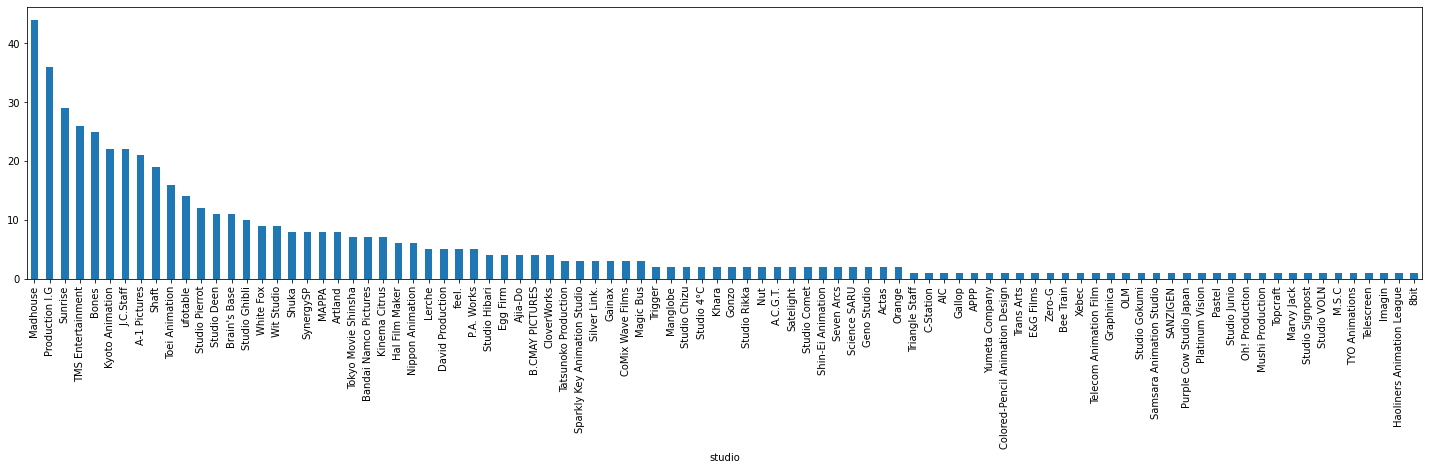

In [15]:
better_studios.plot.bar(figsize=(25, 5))

<AxesSubplot:xlabel='studio'>

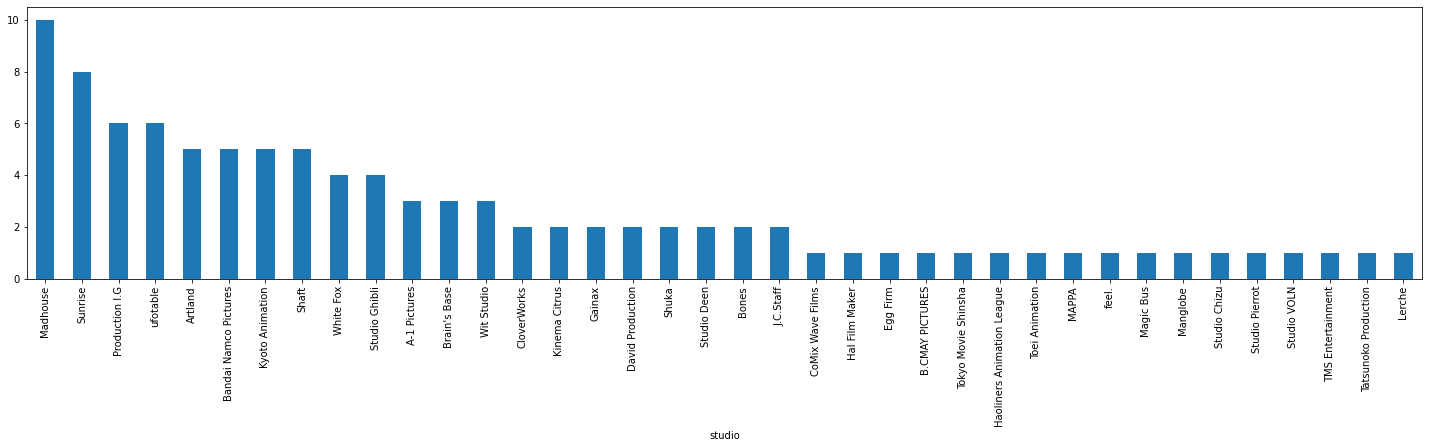

In [16]:
best_studios.plot.bar(figsize=(25, 5))

Opazka: Kvantiteta s kvaliteto v tem primeru nima velike povezave. Če pogledamo samo primer studia *Toei Animation*, ki je do sedaj izdal 220 animejev, od tega ji ima samo 16 oceno nad 8 (prib. 7%) in samo en od njih oceno nad 8.5 (manj kot 0,5%). Gre za studio s tradicijo in verjetno se današnjim gledalcem animacija iz druge polovice 20. stoletja ne zdi preveč dobra. Tak sklep je bil nekako pričakovan, saj studio ni edini faktor, ki vpliva na oceno. Kar pa je treba opozorit in se ne vidi iz analize morda: Če je studio uspešno naredil neko adaptacijo vira, občinstvo od naslednjega projekta pričakuje vsaj toliko in dostikrat se zgodi da se skupina navdupencev razdeli na dvoje: enim je adaptacija všeč, drugim je popoloma zgrešena, spet tretji so nekje vmes.   

Pa izvzamimo animeje pred letom 2010, saj se je v zadnjih letih s sunkovitim razvojem tehnologije, močno razvila tudi animacija in računalniški efekti. Poglejmo si vse skupaj še enkrat.

In [17]:
good_studios_21 = anime[(anime["score"] >= 7) & (anime["year"] >= 2010)].groupby("studio").size().sort_values(ascending=False).head(100)
better_studios_21 = anime[(anime["score"] >= 8) & (anime["year"] >= 2010)].groupby("studio").size().sort_values(ascending=False).head(100)
best_studios_21 = anime[(anime["score"] >= 8.5) & (anime["year"] >= 2010)].groupby("studio").size().sort_values(ascending=False).head(100)

display(good_studios_21.head(10))
display(better_studios_21.head(10))
display(best_studios_21.head(10))

studio
A-1 Pictures         106
Production I.G        97
J.C.Staff             86
Sunrise               82
Toei Animation        66
Studio Deen           63
Bones                 59
TMS Entertainment     57
Kyoto Animation       57
Madhouse              51
dtype: int64

studio
A-1 Pictures         21
Production I.G       20
Kyoto Animation      17
Madhouse             17
Shaft                17
J.C.Staff            16
TMS Entertainment    16
Bones                16
Sunrise              16
ufotable             11
dtype: int64

studio
Madhouse                 6
ufotable                 5
Shaft                    5
Bandai Namco Pictures    5
Artland                  4
White Fox                4
Kyoto Animation          4
Sunrise                  4
Production I.G           4
A-1 Pictures             3
dtype: int64

<AxesSubplot:xlabel='studio'>

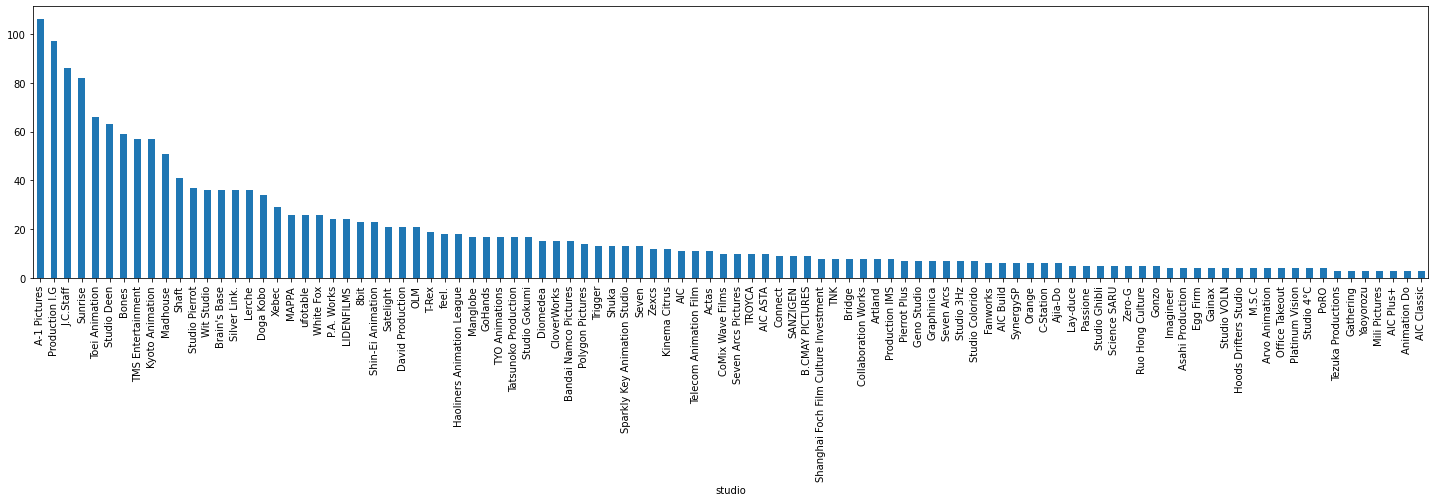

In [18]:
good_studios_21.plot.bar(figsize=(25, 5))

<AxesSubplot:xlabel='studio'>

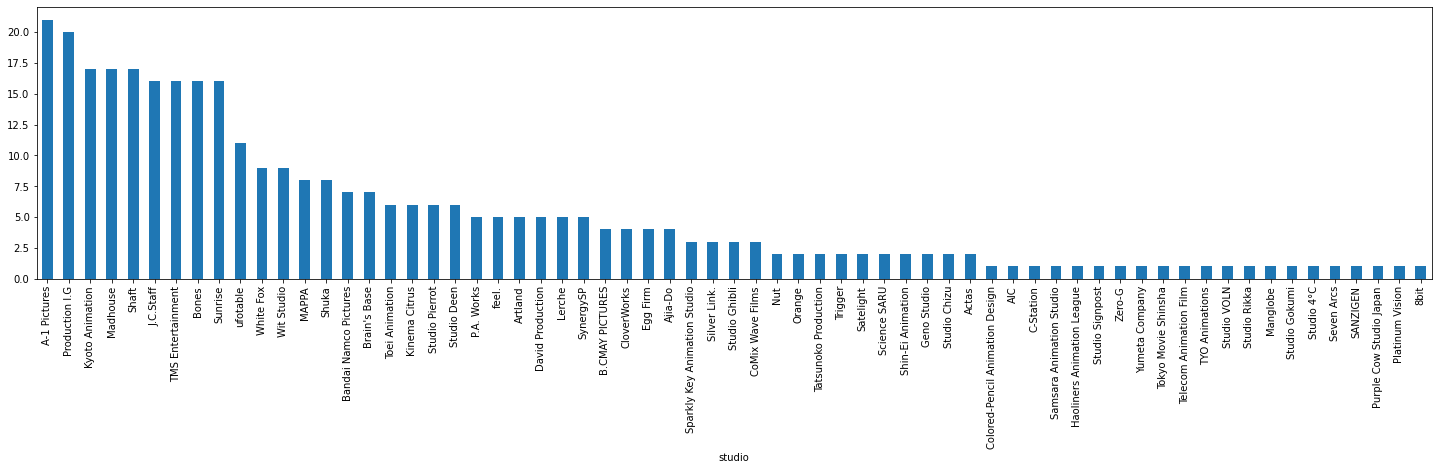

In [19]:
better_studios_21.plot.bar(figsize=(25, 5))

<AxesSubplot:xlabel='studio'>

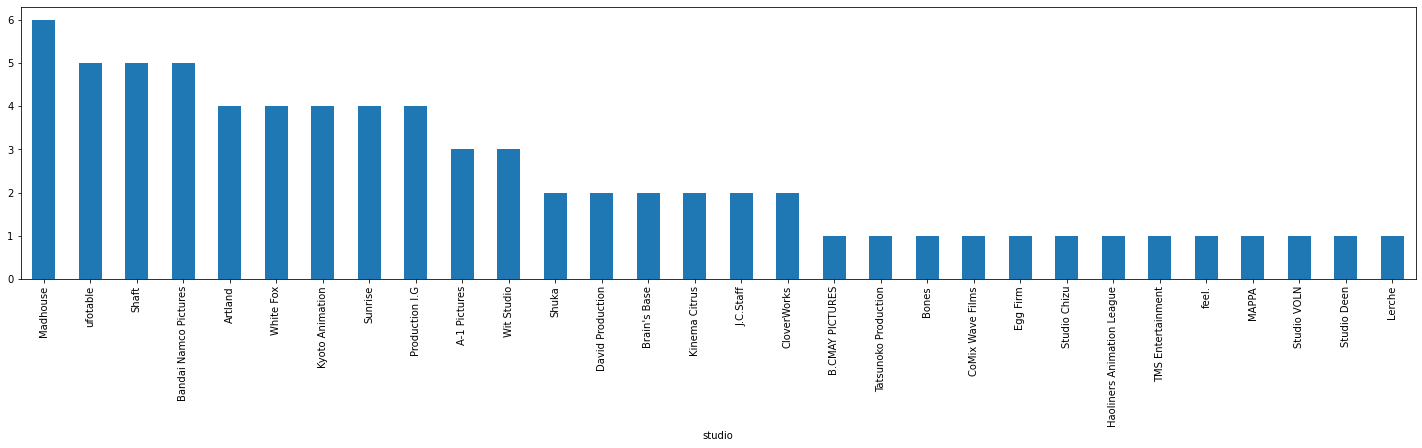

In [20]:
best_studios_21.plot.bar(figsize=(25, 5))

Iz naslednjega grafa si bomo morda lažje predstavljali uspešnost nekaterih studiev.

<AxesSubplot:xlabel='studio', ylabel='score'>

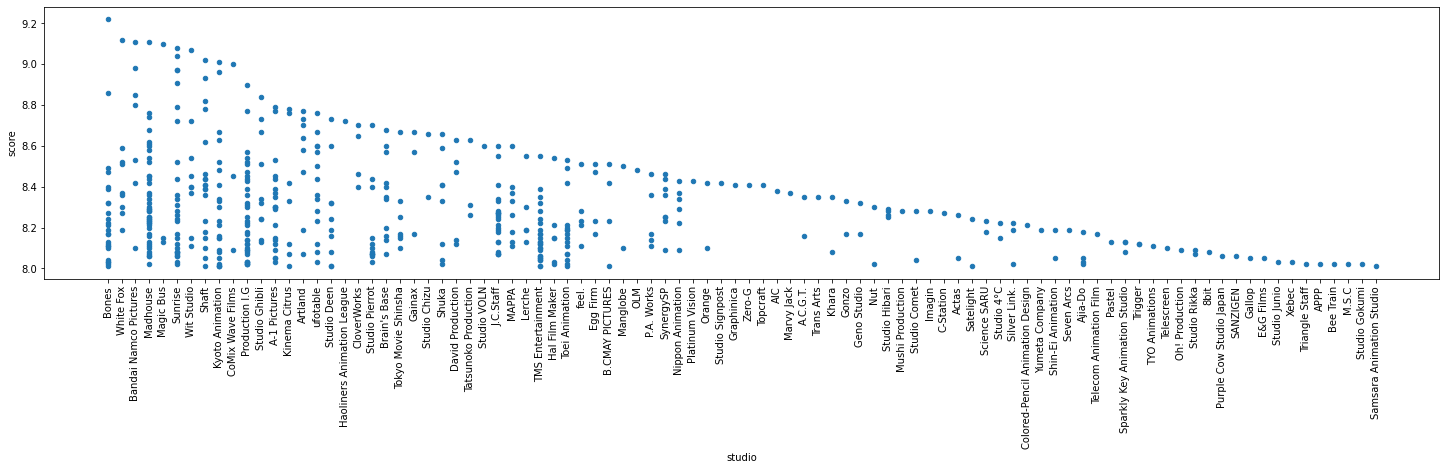

In [21]:
anime[anime["score"] > 8].plot.scatter(x="studio", y="score", figsize=(25, 5), rot=90)

Vseeno pa nam te grafi ne povejo prav dosti več, kot to, da so studia *Madhouse*, *Ufotable*, *Shaft* in druga z lestvice v zadnjem obdobju najboljša na področju kreacije animeja. Seveda pa tudi ostala studia proizvajajo visokokakovosten anime in temu pričajo tudi ocene in popularnost.

Če pa nas zanima točno, kateri stuio se statistišno najbolj primeren, pa lahko tudi to preverimo.

In [22]:
studios_mean = anime.groupby("studio").mean().sort_values("score",ascending=False).head(100)
studios_mean["score"].head(20)

studio
Egg Firm                           8.345000
Colored-Pencil Animation Design    8.210000
Studio Chizu                       8.116667
Samsara Animation Studio           8.010000
Nippon Ramayana Film Co.           7.990000
Djinn Power                        7.810000
Purple Cow Studio Japan            7.730000
Code                               7.720000
Lapin Track                        7.710000
Shuka                              7.708750
Nakamura Production                7.700000
Odolttogi                          7.630000
Fuji TV                            7.620000
Kadokawa                           7.610000
Twin Engine                        7.570000
Animation Do                       7.570000
BeSTACK                            7.515000
Studio Signpost                    7.490000
Light Chaser Animation Studios     7.490000
Life Work                          7.490000
Name: score, dtype: float64

Ker je studiev absolutno preveč, da bi naredilnajboljših nekaj za vsak studio, sem spisal funkcijo, ki jo lahko bralec uporabi, da preveri svoj poljuben studio iz spodnjega seznama.

In [23]:
S = anime["studio"].unique()
sorted(S)



[' Sunrise Beyond',
 '10Gauge',
 '2:10 AM Animation',
 '3xCube',
 '81 Produce',
 '8bit',
 'A-1 Pictures',
 'A-Real',
 'A.C.G.T.',
 'ACC Production',
 'AIC',
 'AIC ASTA',
 'AIC Build',
 'AIC Classic',
 'AIC Frontier',
 'AIC Plus+',
 'AIC Spirits',
 'AIC Takarazuka',
 'APPP',
 'AQUA ARIS',
 'ASK Animation Studio',
 'AT-2',
 'AXsiZ',
 'Academy Productions',
 'Actas',
 'Agent 21',
 'Ajia-Do',
 'Akatsuki',
 'Albacrow',
 'Amber Film Works',
 'Amuse',
 'An DerCen',
 'Anima',
 'Anima&Co.',
 'Animaruya',
 'Animation 21',
 'Animation Do',
 'Animation Staff Room',
 'Anime Antenna Iinkai',
 'Anime R',
 'Ankama Animations',
 'Annapuru',
 'Anpro',
 'Arcs Create',
 'Arcturus',
 'Ark',
 'Arms',
 'Artland',
 'Artmic',
 'Arvo Animation',
 'Asahi Production',
 'Ascension',
 'Ashi Production',
 'Asread',
 'Aubec',
 'Azeta Pictures',
 'B&T',
 'B.CMAY PICTURES',
 'BOOTLEG',
 'BYMENT',
 'Bakken Record',
 'Bandai Namco Pictures',
 'Bandai Spirits',
 'Bandai Visual',
 'BeSTACK',
 'Bee Media',
 'Bee Train',
 'B

In [24]:
def top_x_of_studio(studio, x):
    display(studio)
    filter1 = anime[anime["studio"] == studio]
    display(filter1[["name", "score", "episodes", "year"]].head(x))
    return
top_x_of_studio("White Fox", 8) #Primer

'White Fox'

,name,score,episodes,year
5647,Steins;Gate,9.12,24,2011
15412,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,8.59,13,2020
10437,Steins;Gate 0,8.52,23,2018
6521,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,8.51,1,2013
4633,Katanagatari,8.37,12,2010
6372,Steins;Gate: Oukoubakko no Poriomania,8.36,1,2012
10733,Re:Zero kara Hajimeru Isekai Seikatsu,8.30,25,2016
11103,Steins;Gate: Kyoukaimenjou no Missing Link - D...,8.27,1,2015


Torej povsem statistično gledano ima najboljše povprečjeocen *Egg Firm*, ki ima v svoji knjižnici tudi kar nekaj znanih naslovov (*Dan Machi*, *Gate*, *Knights & Magic* idr.
)

## Anime skozi čas


V prejšnem razdelku smo ugotovili, da ime studia nima tako zelo velikega vpliva, smo ta le-tega pripisali času. Kot smo že prej povedali, se skozi čas animacija spreminja in v novejših serijah opažamo vse več računalniške animacije, ki je vidna s prostim očesom le starim malkom, ki že dalj časa spremljajo animacijo. Prav tko se s časom izboljšuje kvaliteta slike, glasbe in hitros posodabljanja slike (fps). Vse to naredi anime sam po sebi veliko bolj privlačen za oči.

<AxesSubplot:xlabel='year'>

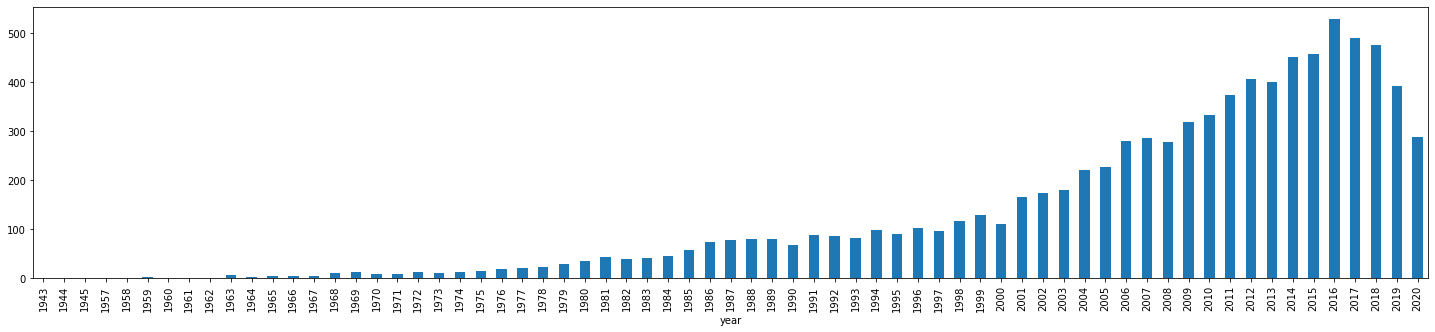

In [25]:
anime_yearly = anime.groupby("year").size().head(100)
anime_yearly.plot.bar(figsize=(25, 5))

Kot smo predvidevali, se z razvojem tehnologije, predvsem pa dostopnostjo in posledično s povpraševanjem količina adaptiranega animeja vse do leta 2016, ko je anime nekako postal veliko bolj občilajen. Vse do nedavnega se je namreč o navdušencih animeja govorilo, kot o drugi rasi. Ampak se je zahvaljujoč dostopnosti in razširjenosti v zadnjih letih ta predsodek do ljudi, ki so gledali anime močno omilili, da ne rečem celo izputel. V zadnjih letih pa vidimo nov upad saj se je začel nov trend in sicer animirani filmi. Gre za to, da namesto, da studio naredi anime serijo z 12 epizodami (trajanje okoli 4h), raje naredijo film (trajanje okoli 2h). Izkaže se, da je vrtenje filma v kinu veliko bolj finančno ugodno, kot vrtenje preko televizijskih zaslonov. Tako si studia za filme ponavadi vzamejo več časa in reducirajo delo na večih animejih hkrati. 
Pa bi nas moralo skrbeti, da je v letu 2020 in 2019 bilo skoraj vsako leto 100 animejv manj? 
Verjetno ne. Kasneje si bomo pogledali, ali ima leto izida vpliv na oceno, v smislu, ali so novejši animeji generalno bolje ocenjeni, kot starejši. To bi bil pravzaprav korak, v dobro smer, saj bi to pomenilo, da se studia raje bolj posvečajo enemu projektu in tega naredijo bolje, kot pa dva površno. Poleg tega se pozna, da je bilo v času COVID-19 veliko projektov prestavljenih in je zato za leto 2021 napovedanih veliko tako novih naslovov, kot nadaljevanj. 

<AxesSubplot:xlabel='year', ylabel='score'>

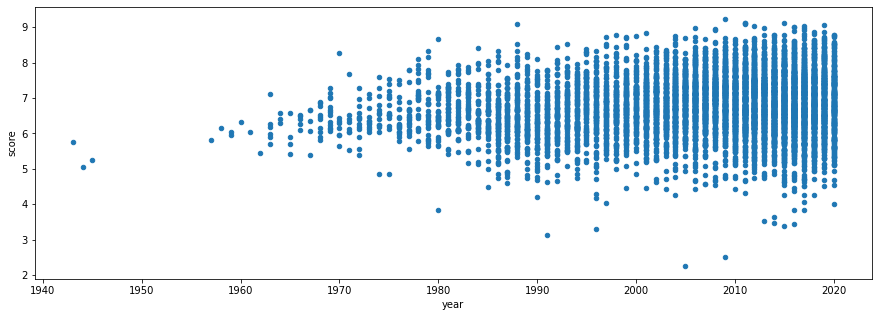

In [26]:
anime.plot.scatter(x="year", y="score", figsize=(15, 5 ))

Ta grafika nam ne poveprav veliko, razen tega, da se količina dobrih animejev veča z vsakim letom, neodvisnood tega, ali novih animejev več ali manj. Vidimo le nek vzorec, da približno enkrat na leto ali pa na vsako drugo leto je javnosti predstavljen nov anime, ki je v primerjavi z ostalimi (tisto leto) zelo visoko. Kakšen poznavalec bi lahko celo določil katero od posameznih pik na vrhu.

In [27]:
anime_by_year_mean = anime.groupby("year").mean().head(100)
anime_by_year_mean["score"].sort_values(ascending=False).head(20)

year
2008    7.043094
1978    6.962609
2009    6.944420
2007    6.940871
2011    6.891070
2012    6.887118
2006    6.886940
2005    6.885727
2010    6.883874
1995    6.877582
2014    6.874181
2019    6.870077
2013    6.863325
2015    6.838775
2018    6.823718
2020    6.823599
2000    6.809636
2004    6.803091
2017    6.784094
2003    6.781611
Name: score, dtype: float64

Leto z najboljšo povprečno oceno je leto 2008. Vendar pa vidimo, da razlike niso velike. Poglejmo še grafično, ker si bomolažje predstavljali.

<AxesSubplot:xlabel='year'>

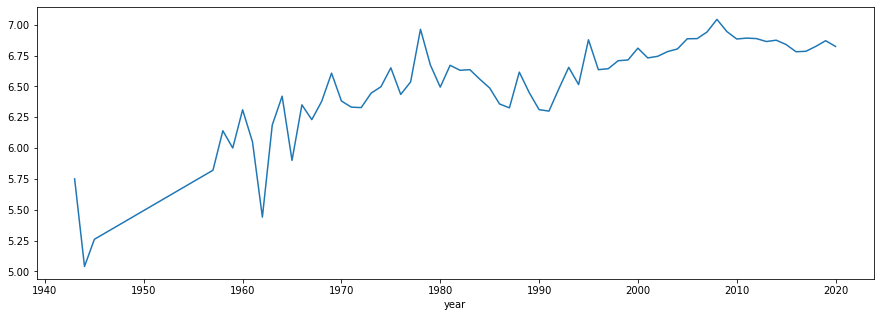

In [28]:
anime_by_year_mean["score"].plot.line(figsize=(15, 5 ))

Opazimo, se povprečno anime boljša vse so leta 2008, potem pa celo malo pade. Zakaj točno je to res, težko trdim vendar bom poskužal pojasniti.
Kakor smo že prej opazili se število animejev iz leta v leto veča, kar pomeni, da dobri animeji manj vplivajo na skupna oceno. Ampak, ker je vzore tako zelo velik, je to le kaplja v morje, torej mora obstajat še en razlog. Od leta 2010 se je začelo veliko novih trendov. Eden med njimi so animeji, ki so zelo med seboj precej podobni, s tu in tam kakšno razliko in pravzaprav je čudež da še po skoraj desetih letih molzenja takih tipov animeja zanimanje še kar ne pade. To so animeji, ki nimajo težke zgodbe, so ponavadi komedične narave in so po definiciji zlata sredina oz. v jeziku ocen 7. Skoraj vsak studio se preizkusi v enem takem šovu. Najbolj značilni sta dve zelo očitni "kategoriji" takih animejev: *"Slice of Life + School Life + Romance / Comedy / Drama"* in *"Isekai"*. Kaj točno ta te dve "kategoriji" animejev, sem opisal na koncu analize.

In [29]:
anime[anime["year"] == 2008].sort_values("score", ascending=False).head(10)


,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
3512,Clannad: After Story (Clannad ~After Story~),4181,24,Finished Airing,"Oct 3, 2008",Kyoto Animation,Visual novel,PG-13 - Teens 13 or older,8.96,"Mar 27, 2009",2008,Fall
2649,Code Geass: Hangyaku no Lelouch R2,2904,25,Finished Airing,"Apr 6, 2008",Sunrise,Original,R - 17+ (violence & profanity),8.91,"Sep 28, 2008",2008,Spring
3553,Kara no Kyoukai 5: Mujun Rasen,4282,1,Finished Airing,"Aug 16, 2008",ufotable,Light novel,R - 17+ (violence & profanity),8.57,NaN,2008,Summer
2917,Aria the Origination,3297,13,Finished Airing,"Jan 8, 2008",Hal Film Maker,Manga,G - All Ages,8.54,"Apr 1, 2008",2008,Winter
3909,One Outs,5040,25,Finished Airing,"Oct 8, 2008",Madhouse,Manga,PG-13 - Teens 13 or older,8.36,"Apr 1, 2009",2008,Fall
3460,Natsume Yuujinchou (Natsume's Book of Friends),4081,13,Finished Airing,"Jul 8, 2008",Brain's Base,Manga,PG-13 - Teens 13 or older,8.34,"Sep 30, 2008",2008,Summer
4800,Gintama: Shiroyasha Koutan,6945,1,Finished Airing,"Sep 21, 2008",Sunrise,Manga,PG-13 - Teens 13 or older,8.34,NaN,2008,Summer
2701,Ookami to Koushinryou (Spice and Wolf),2966,13,Finished Airing,"Jan 9, 2008",Imagin,Light novel,PG-13 - Teens 13 or older,8.28,"Mar 26, 2008",2008,Winter
3539,Toradora!,4224,25,Finished Airing,"Oct 2, 2008",J.C.Staff,Light novel,PG-13 - Teens 13 or older,8.27,"Mar 26, 2009",2008,Fall
2870,Major S4,3226,26,Finished Airing,"Jan 5, 2008",SynergySP,Manga,PG-13 - Teens 13 or older,8.25,"Jun 28, 2008",2008,Winter


Sedaj pa pokukajmo še na najboljše animeje vsakega leta. Ponovno je narejena funkcija, da lahko bralec sam izbere poljubno leto.

In [30]:
def top_x_of_leto(year, x):
    display(year)
    filter1 = anime[anime["year"] == year]
    display(filter1[["name", "score", "episodes", "studio"]].head(x))
    return
top_x_of_leto(2003, 8) #Primer

2003

,name,score,episodes,studio
456,Kino no Tabi: The Beautiful World (Kino's Jour...,8.35,13,A.C.G.T.
305,Planetes,8.31,26,Sunrise
240,Hajime no Ippo: Champion Road (Fighting Spirit...,8.30,1,Madhouse
694,Tokyo Godfathers,8.29,1,Madhouse
241,Hajime no Ippo: Mashiba vs. Kimura,8.23,1,Madhouse
117,Hunter x Hunter: Greed Island,8.22,8,Nippon Animation
100,Fullmetal Alchemist,8.19,51,Bones
671,Interstella5555: The 5tory of The 5ecret 5tar ...,8.13,1,Toei Animation


### Anime glede na rating


Kot vsak vizualni medij ima tudi vsak anime svoj rating, ki naj bi označil ciljno skupino gledalcev, oz. povedano drugače, označil za koga anime zaradi takšnih in drugačnih vsebin ni primeren. 
Rating je popolnoma enak, kot pri filmih, vključno z oznakami, zato pobo predvideli, da je bralec sorazmerno seznanjen s tem. Tako ali tako, predvidevam, da rating ne bo vplival na oceno prav veliko, bomo pa vseeno pogledali, morda pa nas kaj preseneti. Če ne kaj drugega bomo ponovno naredili najboljših 5 za vsak rating.

In [31]:
R = anime[anime["rating"] != "None"]["rating"].unique()
R

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai'],
      dtype=object)

In [32]:
rating = anime.groupby("rating").size()
rating

rating
G - All Ages                      1195
None                               105
PG - Children                      609
PG-13 - Teens 13 or older         4575
R - 17+ (violence & profanity)     959
R+ - Mild Nudity                   733
Rx - Hentai                        416
dtype: int64

Iz tega sedaj vidimo, da je večina animejev primernih za najstnike, potem pa jih je še kar nekaj za mladostnike in še manj za odrasle. Za nekaj jih nimamo podatkov.
Večji del animejev je torej namenjenih najstnikom, saj najbi te imeli največ časa, prav tako, velik delež zgocb, ki ji uprizarjajo animeji govori o glavnih likih, ki so prav tako najstniki in se zato najstniki v realnem življenju z njimi najlažje poistovetijo. 

Poglejmo si še povprečno oceno glede na rating.

rating
R - 17+ (violence & profanity)    7.104588
PG-13 - Teens 13 or older         6.901537
PG - Children                     6.604975
R+ - Mild Nudity                  6.568240
G - All Ages                      6.508017
Rx - Hentai                       6.459087
Name: score, dtype: float64

<AxesSubplot:xlabel='rating'>

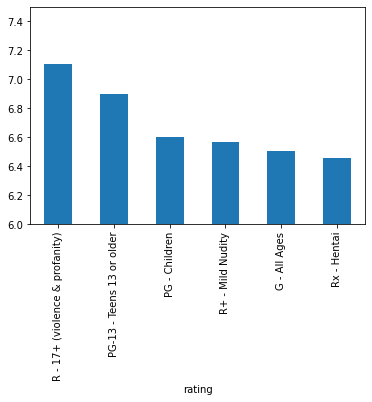

In [33]:
rating_mean = anime[anime["rating"] != "None"].groupby("rating").mean().sort_values("score",ascending=False)
display(rating_mean["score"])
rating_mean["score"].plot.bar(ylim=(6,7.5))

Kot lahko vidimo, sorazlike majhne, saj je velika količina podatkov, vendar razlika za 0,2 med prvim in drugim mestom zato pove kar veliko. 
Razmislimo, zakaj je vrstni red, takšen kakor je. Rating R-17+ vsebuje vse, kar večina ljudi pritegne k animeju na prvem mestu:
- Zgodbo, brez t.i. *plot armorja* (zgodba, ki je speljana tako, da glavni junak nikoli ne more biti na slabšem, oz. vedno najde rešitev iz nemogočih položajev, ponavadi v pretiranem slogu)
- Bolj dodelane karakterje glavnih junakov (govorim o motivu, ciljih itd.)
- Bolj realno doživetje (zaradi načina uprizoritve se lahko starejše osebe bolj navežejo na junake)
- Ukvarja se z bolj kompleksnimi procesi, idejami, ki so lahko po svoji naravi moralno sporni


Skratka, R-17+ omogoča uprizarjanje vsega kar lahko ostali in še več (kar je za zgodbo pomembno)
Seveda obstajajo animeji, ki so namenjeni najstnikom in vsebujejo kakpnega od zgornjih navedkov, ampak na splošno gledano, so te tri zadeve veliko večkrat prisotne v animejih z R-17+ kot npr. PG-13.

Najprej je potem jasno. Najstniki pa tudi nenajstniki se lako povežejo z glavnimi junaki tudi v serija z PG-13 ampak nasplošen ton serije je drugačen. Zelo dober primer je smrt. V večini primerov se v R-17+ nek pretep konča tako, da bodisi en obleži, ali pa celo umre, medtem, ko se v PG-13 slednje redko zgodi. Ta meja se sicer iz leta v leto spušča. Vseeno pa se moramo vprašati: Zakaj potem ni R+ pred R-17+ ? Brez težav bi vsebovalu vse kar vsebuje R-17+ in še več.
Preprosto, ker v dosti primerih je golota pretiravana ali pa preprosto ne paše v kontekst. Za to je verjetno "kriva anime kltura", ki konkretno pretirava pri seksualizaciji.

Rx ne bi ravno komentiral, ampak to je analogno temu, da je snemana pornografija vedno slabše ocenjena kot sneman film. Je pa terba opozorit, da se sploh v zadnjh letih, tam nekje od 2018 naprej, meja med Rx in pa R+ močno tanjša in so predstavniki, ki bi morda že morali biti eno, ko so sicer označeni, kot drugo.

In [34]:
Rt = anime[anime["rating"]!="None"]["rating"].unique()

for rating in sorted(Rt):
    display(rating)
    filter1 = anime[anime["rating"] == rating]
    filter_gintama =  filter1[(filter1["name"].str.contains("Gintama", re.IGNORECASE) == False) | (filter1["name"].str.contains("Gintama Season 4"))]
    display(filter_gintama[["name", "score","year", "episodes"]].head(5))

'G - All Ages'

,name,score,year,episodes
404,Howl no Ugoku Shiro (Howl's Moving Castle),8.67,2004,1
2917,Aria the Origination,8.54,2008,13
6159,Hotarubi no Mori e,8.40,2011,1
12137,Shelter,8.35,2016,1
490,Tonari no Totoro (My Neighbor Totoro),8.34,1988,1


'PG - Children'

,name,score,year,episodes
176,Sen to Chihiro no Kamikakushi (Spirited Away),8.84,2001,1
6689,Ookami Kodomo no Ame to Yuki (Wolf Children),8.66,2012,1
17259,Gotcha!,8.47,2020,1
480,Tenkuu no Shiro Laputa (Castle in the Sky),8.32,1986,1
348,Cardcaptor Sakura Movie 2: Fuuin Sareta Card,8.22,2000,1


'PG-13 - Teens 13 or older'

,name,score,year,episodes
5647,Steins;Gate,9.12,2011,24
9813,Gintama° (Gintama Season 4),9.11,2015,51
6431,Hunter x Hunter (2011) (Hunter x Hunter),9.11,2011,148
12700,3-gatsu no Lion 2nd Season (March Comes In Lik...,9.02,2017,22
9786,Koe no Katachi (A Silent Voice),9.01,2016,1


'R - 17+ (violence & profanity)'

,name,score,year,episodes
3946,Fullmetal Alchemist: Brotherhood,9.22,2009,64
741,Ginga Eiyuu Densetsu (Legend of the Galactic H...,9.10,1988,110
14687,Shingeki no Kyojin Season 3 Part 2,9.07,2019,10
12734,Owarimonogatari 2nd Season (Owarimonogatari Se...,8.93,2017,7
2649,Code Geass: Hangyaku no Lelouch R2,8.91,2008,25


'R+ - Mild Nudity'

,name,score,year,episodes
9,Monster,8.74,2004,74
3696,Tengen Toppa Gurren Lagann Movie 2: Lagann-hen,8.57,2009,1
22,Neon Genesis Evangelion: The End of Evangelion,8.51,1997,1
23,Kenpuu Denki Berserk (Berserk),8.48,1997,25
409,Perfect Blue,8.45,1998,1


'Rx - Hentai'

,name,score,year,episodes
9958,Mankitsu Happening,7.74,2015,4
9230,Rance 01: Hikari wo Motomete The Animation,7.65,2014,4
16388,Ane wa Yanmama Junyuu-chuu,7.61,2020,2
6330,Eroge! H mo Game mo Kaihatsu Zanmai,7.58,2011,6
13576,Youkoso! Sukebe Elf no Mori e,7.51,2018,4


### Anime sezone

Najbolj unikatna zadeva, ki jo pozna le anime svet (poleg žanra Slice of Life), je izhajanje animjevem po sezonah. Stirikrat letno se obrne sezona. Sezone se poimenovane po letnih časih, vendar se ne pokrivajo točno z letnimi časi (vsaj v Sloveniji ne). Vsaka sezona traja 3 mesece, kar je ravno:
(1 epizoda na teden) $\times$  (4 tedni v mesecu)  $\times$  (3 meseci v sezoni) = 12 epizod

Sezone pa so sledeče:
- Zima ("Winter") -> januar, februar, marec
- Pomlad ("Spring") -> april, maj, junij
- Poletje ("Summer") -> julij, avgust, september
- Jesen ("Fall") -> oktober, november, december

Sedaj pa se vprašajmo, ali lahko sezona vpliva na oceno? Predvideval sem, da bo studio malo vplival na oceno, pa ni. Predvideval sem da bo leto, pa je manj kot sem pricakoval. Povsem realno, od tega,v katerisezoni izide anime, ne pričakujem ničesar posebnega, morda pa bo videti kaj zanimivega.


season
Fall      6.826869
Spring    6.819683
Summer    6.772776
Winter    6.778865
Name: score, dtype: float64

<AxesSubplot:xlabel='season'>

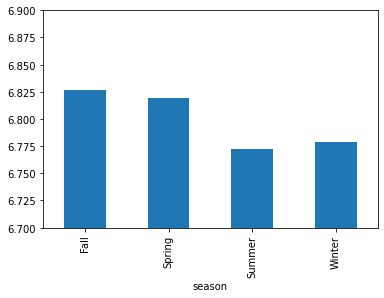

In [35]:
seasons = anime.groupby("season").mean()["score"]
display(seasons)
seasons.plot.bar(ylim=(6.7, 6.9))

Izgleda, da najboljši animeji prhajajo v jesenski sezoni. Je to mogoče kako posebej utemlejiti? Poglejmo še število animijev, ki so do sedaj prišlo v posamezni seznoi.

season
Fall      2338
Spring    2146
Summer    2032
Winter    1983
dtype: int64

<AxesSubplot:xlabel='season'>

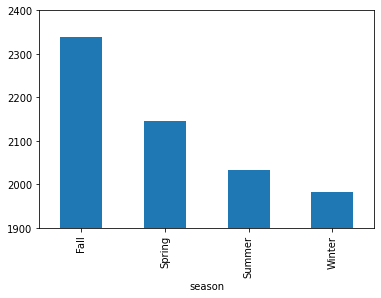

In [36]:
seasons_size = anime.groupby("season").size()
display(seasons_size)
seasons_size.plot.bar(ylim=(1900, 2400))

Vidimo, da sta jesenska in pomladna seznoa veliko bolj npolnjeni, kot drugi dve. Poskusimo premisliti zakaj.
Anime produkcija traja približno eno leto (vključno z izbiro literature za adaptacijo itd.). Ponavadi objavijo projekt za 6 mesecev naprej, 2 meseca pred začetkom imajo ponavadi že vsekončano, tako da možni dopusti (ki so na Japonskem sicer precej redki) ne igrajo glavne vloge.
Ugotovili smo, da so glavna ciljna skupina najstniki. Bilo bi škoda, če bi vrteli anime, najstniki pa le te ne biimeli časa gledati. In to bi bilo ravno med zimsko in poletno sezono. Namreč, v teh dveh obdobjih je konec konferenc in takrat so semesterski testi v vseh šolah. Preostali animeji, ki pridejo v času zimske ai poletne sezone pa so bodisi namenjeni odraslim, ali pa izkoriščajo, da je takrat okrnjena konkurenca. 

Pa poglejmo še najboljše predstavnike vsake sezone. Ker so sezone samo 4 bomo navedli 10 najboljših.

In [37]:
Sea = anime[anime["season"]!= None]["season"].unique()

for season in Sea:
    if season in ["Spring", "Summer", "Fall", "Winter"]:
        display(season)
        filter1 = anime[anime["season"] == season]
        filter_gintama =  filter1[(filter1["name"].str.contains("Gintama", re.IGNORECASE) == False) | (filter1["name"].str.contains("Gintama Season 4"))]
        display(filter_gintama[["name", "score", "aired", "finished airing", "episodes"]].head(10))


'Spring'

,name,score,aired,finished airing,episodes
3946,Fullmetal Alchemist: Brotherhood,9.22,"Apr 5, 2009","Jul 4, 2010",64
5647,Steins;Gate,9.12,"Apr 6, 2011","Sep 14, 2011",24
9813,Gintama° (Gintama Season 4),9.11,"Apr 8, 2015","Mar 30, 2016",51
14687,Shingeki no Kyojin Season 3 Part 2,9.07,"Apr 29, 2019","Jul 1, 2019",10
2649,Code Geass: Hangyaku no Lelouch R2,8.91,"Apr 6, 2008","Sep 28, 2008",25
15961,Kaguya-sama wa Kokurasetai?: Tensai-tachi no R...,8.79,"Apr 11, 2020","Jun 27, 2020",12
0,Cowboy Bebop,8.79,"Apr 3, 1998","Apr 24, 1999",26
9,Monster,8.74,"Apr 7, 2004","Sep 28, 2005",74
8491,Mushishi Zoku Shou (MUSHI-SHI -Next Passage-),8.73,"Apr 5, 2014","Jun 21, 2014",10
14574,Seishun Buta Yarou wa Yumemiru Shoujo no Yume ...,8.70,"Jun 15, 2019",NaN,1


'Fall'

,name,score,aired,finished airing,episodes
6431,Hunter x Hunter (2011) (Hunter x Hunter),9.11,"Oct 2, 2011","Sep 24, 2014",148
12700,3-gatsu no Lion 2nd Season (March Comes In Lik...,9.02,"Oct 14, 2017","Mar 31, 2018",22
3512,Clannad: After Story (Clannad ~After Story~),8.96,"Oct 3, 2008","Mar 27, 2009",24
11460,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...,8.90,"Oct 8, 2016","Dec 10, 2016",10
8806,Shigatsu wa Kimi no Uso (Your Lie in April),8.77,"Oct 10, 2014","Mar 20, 2015",22
9795,Haikyuu!! Second Season (Haikyu!! 2nd Season),8.77,"Oct 4, 2015","Mar 27, 2016",25
9096,Mushishi Zoku Shou 2nd Season,8.77,"Oct 19, 2014","Dec 21, 2014",10
239,Hajime no Ippo (Fighting Spirit),8.76,"Oct 4, 2000","Mar 27, 2002",75
1427,Code Geass: Hangyaku no Lelouch,8.72,"Oct 6, 2006","Jul 29, 2007",25
16048,Tian Guan Ci Fu,8.72,"Oct 31, 2020","Jan 2, 2021",11


'Winter'

,name,score,aired,finished airing,episodes
741,Ginga Eiyuu Densetsu (Legend of the Galactic H...,9.10,"Jan 8, 1988","Mar 17, 1997",110
14053,Mob Psycho 100 II,8.86,"Jan 7, 2019","Apr 1, 2019",13
10952,Kizumonogatari III: Reiketsu-hen,8.82,"Jan 6, 2017",NaN,1
13670,Made in Abyss Movie 3: Fukaki Tamashii no Reimei,8.78,"Jan 17, 2020",NaN,1
25,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,8.73,"Feb 20, 1999","Sep 22, 1999",4
6538,Natsume Yuujinchou Shi (Natsume's Book of Frie...,8.68,"Jan 3, 2012","Mar 27, 2012",13
4025,Hajime no Ippo: New Challenger (Fighting Spiri...,8.68,"Jan 7, 2009","Jul 1, 2009",26
4939,Suzumiya Haruhi no Shoushitsu,8.67,"Feb 6, 2010",NaN,1
14228,Yakusoku no Neverland (The Promised Neverland),8.65,"Jan 10, 2019","Mar 29, 2019",12
11687,Violet Evergarden,8.63,"Jan 11, 2018","Apr 5, 2018",13


'Summer'

,name,score,aired,finished airing,episodes
9786,Koe no Katachi (A Silent Voice),9.01,"Sep 17, 2016",NaN,1
11148,Kimi no Na wa. (Your Name.),9.00,"Aug 26, 2016",NaN,1
12734,Owarimonogatari 2nd Season (Owarimonogatari Se...,8.93,"Aug 12, 2017","Aug 13, 2017",7
176,Sen to Chihiro no Kamikakushi (Spirited Away),8.84,"Jul 20, 2001",NaN,1
7521,Monogatari Series: Second Season,8.78,"Jul 7, 2013","Dec 29, 2013",26
11520,Fate/stay night Movie: Heaven's Feel - III. Sp...,8.76,"Aug 15, 2020",NaN,1
12315,Made in Abyss,8.76,"Jul 7, 2017","Sep 29, 2017",13
142,Mononoke Hime (Princess Mononoke),8.73,"Jul 12, 1997",NaN,1
14060,Vinland Saga,8.72,"Jul 8, 2019","Dec 30, 2019",24
6689,Ookami Kodomo no Ame to Yuki (Wolf Children),8.66,"Jul 21, 2012",NaN,1


### Anime vir


Do sedaj ni nič razen zgodbe same prav zares vplivalo na oceno animejev. Zadnje upe zato polagam v vir. Gre za enega najbolj kontroverznih zadev v anime skupnosti. Studia anime adaptirajo glede na različne vire. Pogledali si bomo, kateri je najbolj popularen in pri adaptaciji katerega imajo studia najboljšo oceno.

In [38]:
C = anime["source"].unique()

for source in C:
    display(source)

'Manga'

'Visual novel'

'Novel'

'Original'

'Light novel'

'Web manga'

'Game'

'Music'

'4-koma manga'

'Other'

'Unknown'

'Book'

'Picture book'

'Card game'

'Digital manga'

'Radio'

source
4-koma manga      223
Book               49
Card game          47
Digital manga      12
Game              557
Light novel       646
Manga            2830
Music              56
Novel             334
Original         1899
Other             184
Picture book       22
Radio               5
Unknown          1029
Visual novel      540
Web manga         159
dtype: int64

<AxesSubplot:xlabel='source'>

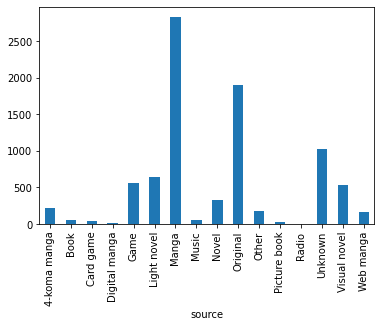

In [39]:
source_size = anime.groupby("source").size()
display(source_size)
source_size.plot.bar()

Najbolj popularna oblika adaptacije je manga. Če bralca zanima kaj katera od stvar imen, svetujem da se samostojno pozanima, da ne bom preveč zašel iz analize podatkov.
Poglejmo sedaj še, kako pa je s povprešnimi ocenami.

source
Light novel      7.131223
Manga            7.044731
Novel            6.956557
Web manga        6.914340
4-koma manga     6.832780
Book             6.789388
Original         6.671859
Visual novel     6.633593
Game             6.534111
Card game        6.448723
Other            6.438859
Picture book     6.435909
Unknown          6.384198
Music            6.379643
Radio            6.012000
Digital manga    5.962500
Name: score, dtype: float64

<AxesSubplot:xlabel='source'>

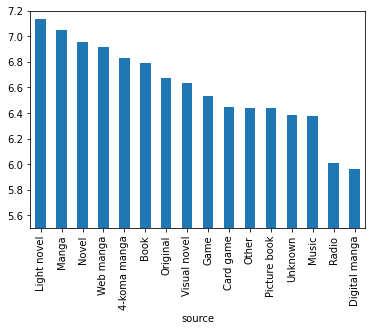

In [40]:
source = anime.groupby("source").mean("score").sort_values("score", ascending=False)["score"]
display(source)
source.plot.bar(ylim=(5.5, 7.2))

Po mnenju skupnosti so tako najbolje adaptirane lahke novele, za njimi pa potem manga in novele.
Pa si poglejmo pe najboljše adaptacije posameznega vira.

In [41]:
Ada = anime["source"].unique()

for source in Ada:
    display(source)
    filter1 = anime[anime["source"] == source]
    filter_gintama =  filter1[(filter1["name"].str.contains("Gintama", re.IGNORECASE) == False) | (filter1["name"].str.contains("Gintama Season 4"))]
    display(filter_gintama[["name", "score", "year", "episodes"]].head(5))

'Manga'

,name,score,year,episodes
3946,Fullmetal Alchemist: Brotherhood,9.22,2009,64
9813,Gintama° (Gintama Season 4),9.11,2015,51
6431,Hunter x Hunter (2011) (Hunter x Hunter),9.11,2011,148
14687,Shingeki no Kyojin Season 3 Part 2,9.07,2019,10
12700,3-gatsu no Lion 2nd Season (March Comes In Lik...,9.02,2017,22


'Visual novel'

,name,score,year,episodes
5647,Steins;Gate,9.12,2011,24
3512,Clannad: After Story (Clannad ~After Story~),8.96,2008,24
11520,Fate/stay night Movie: Heaven's Feel - III. Sp...,8.76,2020,1
11519,Fate/stay night Movie: Heaven's Feel - II. Los...,8.60,2019,1
10437,Steins;Gate 0,8.52,2018,23


'Novel'

,name,score,year,episodes
741,Ginga Eiyuu Densetsu (Legend of the Galactic H...,9.10,1988,110
16048,Tian Guan Ci Fu,8.72,2020,11
404,Howl no Ugoku Shiro (Howl's Moving Castle),8.67,2004,1
5123,Yojouhan Shinwa Taikei (The Tatami Galaxy),8.61,2010,11
13199,Kimi no Suizou wo Tabetai (I want to eat your ...,8.60,2018,1


'Original'

,name,score,year,episodes
11148,Kimi no Na wa. (Your Name.),9.00,2016,1
2649,Code Geass: Hangyaku no Lelouch R2,8.91,2008,25
176,Sen to Chihiro no Kamikakushi (Spirited Away),8.84,2001,1
0,Cowboy Bebop,8.79,1998,26
142,Mononoke Hime (Princess Mononoke),8.73,1997,1


'Light novel'

,name,score,year,episodes
12734,Owarimonogatari 2nd Season (Owarimonogatari Se...,8.93,2017,7
10952,Kizumonogatari III: Reiketsu-hen,8.82,2017,1
7521,Monogatari Series: Second Season,8.78,2013,26
14574,Seishun Buta Yarou wa Yumemiru Shoujo no Yume ...,8.70,2019,1
4939,Suzumiya Haruhi no Shoushitsu,8.67,2010,1


'Web manga'

,name,score,year,episodes
14053,Mob Psycho 100 II,8.86,2019,13
13670,Made in Abyss Movie 3: Fukaki Tamashii no Reimei,8.78,2020,1
12315,Made in Abyss,8.76,2017,13
10326,One Punch Man,8.60,2015,12
11102,Mob Psycho 100,8.49,2016,12


'Game'

,name,score,year,episodes
17259,Gotcha!,8.47,2020,1
10699,Persona 3 the Movie 4: Winter of Rebirth,8.03,2016,1
2687,Final Fantasy VII: Advent Children Complete,7.98,2009,1
14437,Fate/Grand Order: Zettai Majuu Sensen Babylonia,7.97,2019,21
13726,IDOLiSH7 Vibrato,7.96,2018,8


'Music'

,name,score,year,episodes
12137,Shelter,8.35,2016,1
671,Interstella5555: The 5tory of The 5ecret 5tar ...,8.13,2003,1
5940,Snow Halation,7.72,2010,1
16291,Tokyo Autumn Session,7.60,2020,1
12552,Happy Party Train,7.56,2017,1


'4-koma manga'

,name,score,year,episodes
5808,K-On! Movie (K-ON! The Movie),8.34,2011,1
10934,Working!!!: Lord of the Takanashi,8.21,2016,1
5125,K-On!! (K-ON! Season 2),8.15,2010,26
7678,Hidamari Sketch: Sae Hiro Sotsugyou-hen,8.10,2013,2
9309,Working!!! (Wagnaria!!3),8.05,2015,13


'Other'

,name,score,year,episodes
7436,Kaguya-hime no Monogatari (The Tale of the Pri...,8.24,2013,1
3857,Ramayana: The Legend of Prince Rama,7.99,1992,1
363,Haibane Renmei,7.99,2002,13
15741,Aggressive Retsuko (ONA) 3rd Season,7.96,2020,10
16143,Love Live! Nijigasaki Gakuen School Idol Douko...,7.91,2020,13


'Unknown'

,name,score,year,episodes
4761,xxxHOLiC Rou,8.23,2010,2
3867,Tsubasa: Shunraiki,8.14,2009,2
1251,Yuusha-Ou GaoGaiGar Final (GaoGaiGar Final),8.08,2000,8
2236,Koukaku Kidoutai: Stand Alone Complex 2nd GIG ...,8.02,2006,1
3786,Aria the Origination: Sono Choppiri Himitsu no...,8.02,2008,1


'Book'

,name,score,year,episodes
1962,Tanoshii Muumin Ikka,8.10,1990,78
1783,Arashi no Yoru ni,7.72,2005,1
2110,Muumindani no Suisei,7.68,1992,1
1540,Romeo x Juliet,7.67,2007,24
6817,Madang-eul Naon Amtalg (Daisy: A Hen into the ...,7.63,2011,1


'Picture book'

,name,score,year,episodes
5632,Omae Umasou da na (You Are Umasou),8.02,2010,1
11634,Honobono Log,7.40,2016,10
2086,Little Nemo (Little Nemo: Adventures in Slumbe...,7.26,1989,1
4820,Kaidan Restaurant,7.26,2009,23
2006,Chirin no Suzu (Ringing Bell),7.07,1978,1


'Card game'

,name,score,year,episodes
8471,Shingeki no Bahamut: Genesis (Rage of Bahamut:...,7.69,2014,12
10501,Shingeki no Bahamut: Virgin Soul (Rage of Baha...,7.48,2017,24
8992,Selector Spread WIXOSS,7.40,2014,12
8568,Selector Infected WIXOSS,7.28,2014,12
10751,Selector Destructed WIXOSS Movie,7.23,2016,1


'Digital manga'

,name,score,year,episodes
13284,Katainaka ni Totsuidekita ○-ssia Musume to H S...,7.17,2017,4
14804,"Chikan Shita Joshi*sei to Sonogo, Musabori Au ...",7.16,2018,2
11999,Oshiete! Galko-chan: Natsuyasumitte Hontou Des...,7.14,2017,1
11048,Oshiete! Galko-chan (Please tell me! Galko-chan),7.13,2016,12
15510,Mao Yao de Huo Han (Love Story of Cat Spirit),6.76,2018,20


'Radio'

,name,score,year,episodes
2280,Chance Triangle Session,6.55,2001,13
680,Trouble Chocolate,6.54,1999,20
6237,Mobile Suit Gundam 0083: Stardust Memory - The...,6.01,1992,1
2241,Dennou Sentai Voogie's★Angel (Voogie's Angel),5.54,1997,3
10540,Suzakinishi The Animation,5.42,2015,12


## Zaključek

Ugotovili, smo, da na končno oceno še najbolj vpliva rating, poleg zgodbe in izgleda seveda. Morda nismo izvedeli nič prav zares presenetljivega, smo pa definirali najboljši anime za vsako podkategorijo, ki si jo lahko povprečen navdušenec zamisli (razen žanra Slice of Life). 



In [43]:

def search(seznam):
    regular = ""
    output = anime
    test_final = output["name"].str.contains("test_final")
    for name in seznam:
        test = output["name"].str.contains(name)
        test_final = (test_final | test)
    output = output[test_final]
    pd.set_option_max_rows=None
    display(output)
    
    return     
search(["Fullmetal", "Steins", "Re:Zero"]) #Primer

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
3946,Fullmetal Alchemist: Brotherhood,5114,64,Finished Airing,"Apr 5, 2009",Bones,Manga,R - 17+ (violence & profanity),9.22,"Jul 4, 2010",2009,Spring
5647,Steins;Gate,9253,24,Finished Airing,"Apr 6, 2011",White Fox,Visual novel,PG-13 - Teens 13 or older,9.12,"Sep 14, 2011",2011,Spring
15412,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,39587,13,Finished Airing,"Jul 8, 2020",White Fox,Light novel,R - 17+ (violence & profanity),8.59,"Sep 30, 2020",2020,Summer
10437,Steins;Gate 0,30484,23,Finished Airing,"Apr 12, 2018",White Fox,Visual novel,PG-13 - Teens 13 or older,8.52,"Sep 27, 2018",2018,Spring
6521,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,11577,1,Finished Airing,"Apr 20, 2013",White Fox,Visual novel,PG-13 - Teens 13 or older,8.51,NaN,2013,Spring
6372,Steins;Gate: Oukoubakko no Poriomania,10863,1,Finished Airing,"Feb 22, 2012",White Fox,Visual novel,PG-13 - Teens 13 or older,8.36,NaN,2012,Winter
10733,Re:Zero kara Hajimeru Isekai Seikatsu,31240,25,Finished Airing,"Apr 4, 2016",White Fox,Light novel,R - 17+ (violence & profanity),8.30,"Sep 19, 2016",2016,Spring
11103,Steins;Gate: Kyoukaimenjou no Missing Link - D...,32188,1,Finished Airing,"Dec 3, 2015",White Fox,Visual novel,PG-13 - Teens 13 or older,8.27,NaN,2015,Fall
100,Fullmetal Alchemist,121,51,Finished Airing,"Oct 4, 2003",Bones,Manga,PG-13 - Teens 13 or older,8.19,"Oct 2, 2004",2003,Fall
4561,Fullmetal Alchemist: Brotherhood Specials,6421,4,Finished Airing,"Aug 26, 2009",Bones,Manga,PG-13 - Teens 13 or older,8.04,"Aug 25, 2010",2009,Summer


Slice of Life update, bom mogoče dodal kasneje. Najverjetneje ne bi veliko spremenilo, saj je večina animejev s tem žanrom že vsebovana (Slice of Life skoraj nikoli ni samostojen žanr).

Dolgujem pa še pojasnilo glede "Slice of Life + School Life + Romance / Comedy / Drama" in "Isekai".

*"Slice of Life + School Life + Romance / Comedy / Drama"* - anime brez prave zgodbe, ponavadi govori o dijaku, ki ima sicer nek cilj v življenju, vendar ni nobenih zlobnežel ipd. Govori o njemu in grupi njegovih prijatlejv in kaj počnejo vvsakdanjem življenju, s kakpnimi težavami se kot najstniki srečujejo itd. Včasih so težave malo bolj resne, takrat ima dodaten žanr Drama, včasih pa gre zgolj za zbadanje in komedične scene - takrat dobi žanr Comedy. Všasih pa tudi govori o najstniški ljubezni. Take vrste aimeji so v zlati sredini, ker ni stvari, ki bi se zgodila, da bi lahko anime ocenil z manj kot 7, po drugi strani pa tudi se ne zgodi nič, za kar bi ji lahko dal več kot 8.

*Isekai* - je tip animeja, kjer je glavni gralec iz takpnega ali drugačnega razloga prerojen v drugi svet ("dobesedni pomen besede 'isekai' je drugi svet). Ponavadi je to fantazijski svet pol magije itd. Glavni junak postane pustolovec in ponavad ima kakšno super moč, da ga naredi veliko bojšega od drugih. Podobno kot pri zgornjem primeru. Stvari se dogajajo ampak so bodisi predvdljive bodisi neopazne. Tako da na koncu koncev ne moreš oceniti aimeja z več kot 8 in manj kot 7.